In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import statsmodels.api as sm
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [2]:
train_df = pd.read_csv("vehicle_loan_train.csv")
test_df = pd.read_csv("vehicle_loan_test.csv")

In [3]:
train_df

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id   
0         420825             50578       58400  89.55         67        22807  \
1         537409             47145       65550  73.23         67        22807   
2         417566             53278       61360  89.63         67        22807   
3         624493             57513       66113  88.48         67        22807   
4         539055             52378       60300  88.39         67        22807   
...          ...               ...         ...    ...        ...          ...   
233149    626432             63213      105405  60.72         34        20700   
233150    606141             73651      100600  74.95         34        23775   
233151    613658             33484       71212  48.45         77        22186   
233152    548084             34259       73286  49.10         77        22186   
233153    630213             75751      116009  66.81         77        22186   

        manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type   
0                    45                1441      01-01-84        Salaried  \
1                    45                1502      31-07-85   Self employed   
2                    45                1497      24-08-85   Self employed   
3                    45                1501      30-12-93   Self employed   
4                    45                1495      09-12-77   Self employed   
...                 ...                 ...           ...             ...   
233149               48                1050      01-08-88        Salaried   
233150               51                 990      05-12-88   Self employed   
233151               86                2299      01-06-76        Salaried   
233152               86                2299      26-03-94        Salaried   
233153               86                2299      18-02-84        Salaried   

        ... SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT   
0       ...                     0                     0                   0  \
1       ...                     0                     0                1991   
2       ...                     0                     0                   0   
3       ...                     0                     0                  31   
4       ...                     0                     0                   0   
...     ...                   ...                   ...                 ...   
233149  ...                     0                     0                4084   
233150  ...                     0                     0                1565   
233151  ...                     0                     0                   0   
233152  ...                     0                     0                   0   
233153  ...                     0                     0                   0   

        SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS   
0                    0                             0  \
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0                             0   
...                ...                           ...   
233149               0                             0   
233150               0                             0   
233151               0                             0   
233152               0                             0   
233153               0                             0   

        DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE   
0                                         0         0yrs 0mon  \
1                                         1        1yrs 11mon   
2                                         0         0yrs 0mon   
3                                         0         0yrs 8mon   
4                                         0         0yrs 0mon   
...                                     ...               ...   
233149                           

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [12]:
train_df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [4]:
train_df["Employment.Type"].value_counts(normalize = True)*100

Employment.Type
Self employed    56.602644
Salaried         43.397356
Name: proportion, dtype: float64

In [5]:
train_df.dropna(subset = ['Employment.Type'], inplace = True)

In [6]:
train_df.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

# Data Analysis 

In [6]:
pd.set_option('display.max_columns', 500)
train_df.describe()

UniqueID  disbursed_amount    asset_cost            ltv   
count  225493.000000      225493.00000  2.254930e+05  225493.000000  \
mean   535677.453783       54240.72883  7.563113e+04      74.806634   
std     68337.222749       12775.59006  1.852758e+04      11.441890   
min    417428.000000       13320.00000  3.700000e+04      13.500000   
25%    476481.000000       47049.00000  6.562500e+04      68.960000   
50%    535593.000000       53703.00000  7.080700e+04      76.890000   
75%    594774.000000       60213.00000  7.896600e+04      83.730000   
max    671084.000000      987354.00000  1.328954e+06      95.000000   

           branch_id    supplier_id  manufacturer_id  Current_pincode_ID   
count  225493.000000  225493.000000    225493.000000       225493.000000  \
mean       73.070614   19645.597890        69.072251         3375.718133   
std        70.014147    3494.023799        22.164680         2253.216519   
min         1.000000   10524.000000        45.000000            1.000000   
25%        14.000000   16555.000000        48.000000         1509.000000   
50%        61.000000   20333.000000        86.000000         2949.000000   
75%       130.000000   23004.000000        86.000000         5682.000000   
max       261.000000   24803.000000       156.000000         7345.000000   

            State_ID  Employee_code_ID  MobileNo_Avl_Flag    Aadhar_flag   
count  225493.000000     225493.000000           225493.0  225493.000000  \
mean        7.241551       1550.665453                1.0       0.837720   
std         4.460856        975.664631                0.0       0.368708   
min         1.000000          1.000000                1.0       0.000000   
25%         4.000000        713.000000                1.0       1.000000   
50%         6.000000       1452.000000                1.0       1.000000   
75%        10.000000       2365.000000                1.0       1.000000   
max        22.000000       3795.000000                1.0       1.000000   

            PAN_flag   VoterID_flag   Driving_flag  Passport_flag   
count  225493.000000  225493.000000  225493.000000  225493.000000  \
mean        0.077386       0.147127       0.023686       0.002138   
std         0.267204       0.354233       0.152069       0.046184   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       PERFORM_CNS.SCORE  PRI.NO.OF.ACCTS  PRI.ACTIVE.ACCTS   
count      225493.000000    225493.000000     225493.000000  \
mean          293.040449         2.462360          1.053767   
std           338.874784         5.223012          1.952015   
min             0.000000         0.000000          0.000000   
25%             0.000000         0.000000          0.000000   
50%            15.000000         1.000000          0.000000   
75%           680.000000         3.000000          1.000000   
max           890.000000       453.000000        144.000000   

       PRI.OVERDUE.ACCTS  PRI.CURRENT.BALANCE  PRI.SANCTIONED.AMOUNT   
count      225493.000000         2.254930e+05           2.254930e+05  \
mean            0.158989         1.684813e+05           2.220736e+05   
std             0.553415         9.516692e+05           2.411722e+06   
min             0.000000        -6.678296e+06           0.000000e+00   
25%             0.000000         0.000000e+00           0.000000e+00   
50%             0.000000         0.000000e+00           0.000000e+00   
75%             0.000000         3.630000e+04           6.490000e+04   
max            25.000000         9.652492e+07           1.000000e+09   

       PRI.DISBURSED.AMOUNT  SEC.NO.OF.ACCTS  SEC.ACTIVE.ACCTS   
count          2.254930e+05    225493.000000     225493.000000  \
mean           2.216098e+05    

In [7]:
a = train_df.branch_id.value_counts()
a

branch_id
2      13003
67     10858
3       9214
5       9096
36      8818
       ...  
217      183
261      176
84       152
111       76
158       67
Name: count, Length: 82, dtype: int64

In [8]:
train_df.loan_default.value_counts(normalize = True)*100#.plot.bar(color = "palevioletred", width = 0.5)

loan_default
0    78.28447
1    21.71553
Name: proportion, dtype: float64

<Axes: xlabel='loan_default'>

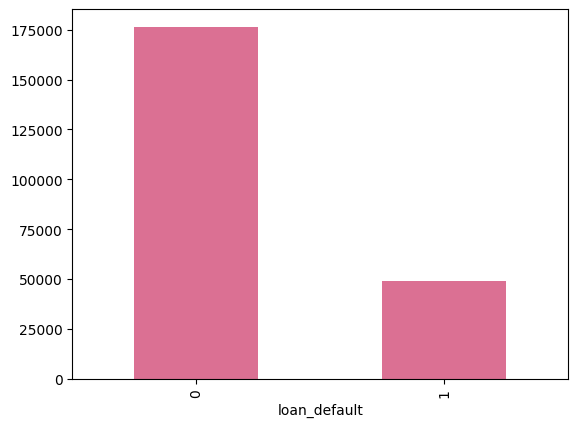

In [43]:
train_df.loan_default.value_counts().plot.bar(color = "palevioletred", width = 0.5)

<Axes: xlabel='branch_id'>

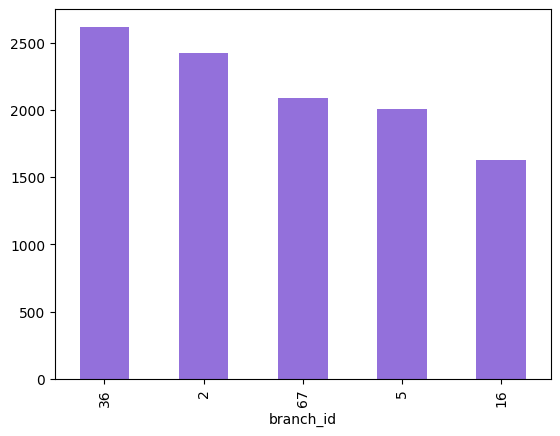

In [9]:
#Top 5 branch with highest default
b = train_df[train_df["loan_default"]== 1].branch_id.value_counts()
b[0:5].plot.bar(color = "mediumpurple", width = 0.5)

<Axes: xlabel='branch_id'>

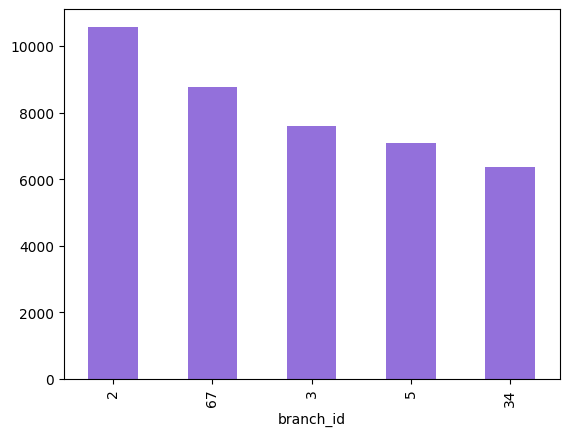

In [101]:
#top 5 branch with least default
b = train_df[train_df["loan_default"]== 0].branch_id.value_counts()
b[0:5].plot.bar(color = "mediumpurple", width = 0.5)

In [9]:
#Loss to company 
train_df[train_df["loan_default"]==0]['disbursed_amount'].sum()

9480724651

# Categorical Variable Analysis

In [10]:
# default rate in salaried and self-employed
train_df[(train_df['Employment.Type']== 'Salaried')].loan_default.value_counts()

loan_default
0    77948
1    19910
Name: count, dtype: int64

In [11]:
# percentage of salaried who defaulted
c = (train_df[(train_df['Employment.Type']== 'Salaried') & (train_df['loan_default']) == 1].shape[0]/(train_df[(train_df['Employment.Type']== 'Salaried')].shape[0]))*100
print("Percentage of salaried people who defaulted =" , c, "%")
print("Percentage of Self-Employed people who defaulted =" , (train_df[(train_df['Employment.Type']== 'Self employed') & (train_df['loan_default']) == 1].shape[0]/(train_df[(train_df['Employment.Type']== 'Self employed')].shape[0]))*100, "%")

Percentage of salaried people who defaulted = 20.345807190010014 %
Percentage of Self-Employed people who defaulted = 22.765699063736434 %


In [12]:
df_emp = pd.crosstab(train_df['Employment.Type'], train_df["loan_default"])
df_emp.rename(columns = {0:"Not Defaulted",1:"Defaulted"}, inplace = True)

In [13]:
px.bar(df_emp, barmode = 'group')

In [14]:
# turning salaried and self-employed into categorical variable
train_df["Self employed"] = pd.get_dummies(train_df["Employment.Type"],drop_first = True, dtype =int)
train_df.head()

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id   
0    420825             50578       58400  89.55         67        22807  \
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type   
0               45                1441      01-01-84        Salaried  \
1               45                1502      31-07-85   Self employed   
2               45                1497      24-08-85   Self employed   
3               45                1501      30-12-93   Self employed   
4               45                1495      09-12-77   Self employed   

  DisbursalDate  State_ID  Employee_code_ID  MobileNo_Avl_Flag  Aadhar_flag   
0      03-08-18         6              1998                  1            1  \
1      26-09-18         6              1998                  1            1   
2      01-08-18         6              1998                  1            1   
3      26-10-18         6              1998                  1            1   
4      26-09-18         6              1998                  1            1   

   PAN_flag  VoterID_flag  Driving_flag  Passport_flag  PERFORM_CNS.SCORE   
0         0             0             0              0                  0  \
1         0             0             0              0                598   
2         0             0             0              0                  0   
3         0             0             0              0                305   
4         0             0             0              0                  0   

  PERFORM_CNS.SCORE.DESCRIPTION  PRI.NO.OF.ACCTS  PRI.ACTIVE.ACCTS   
0   No Bureau History Available                0                 0  \
1                 I-Medium Risk                1                 1   
2   No Bureau History Available                0                 0   
3              L-Very High Risk                3                 0   
4   No Bureau History Available                0                 0   

   PRI.OVERDUE.ACCTS  PRI.CURRENT.BALANCE  PRI.SANCTIONED.AMOUNT   
0                  0                    0                      0  \
1                  1                27600                  50200   
2                  0                    0                      0   
3                  0                    0                      0   
4                  0                    0                      0   

   PRI.DISBURSED.AMOUNT  SEC.NO.OF.ACCTS  SEC.ACTIVE.ACCTS  SEC.OVERDUE.ACCTS   
0                     0                0                 0                  0  \
1                 50200                0                 0                  0   
2                     0                0                 0                  0   
3                     0                0                 0                  0   
4                     0                0                 0                  0   

   SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT   
0                    0                      0                     0  \
1                    0                      0                     0   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   

   PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS   
0                   0               0                             0  \
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   D

In [195]:
# checking for number of mobile number availabilty who defaulted
print("Percentage of People who have a mobile phone and defaulted = =" , train_df[(train_df['MobileNo_Avl_Flag']== 1) & (train_df['loan_default']) == 1].shape[0]/(train_df[(train_df['MobileNo_Avl_Flag']== 1)].shape[0])*100)
print("Percentage of People who have a mobile phone and did not default =" , train_df[(train_df['MobileNo_Avl_Flag']== 1) & (train_df['loan_default'] == 0)].shape[0]/(train_df[(train_df['MobileNo_Avl_Flag']== 1)].shape[0])*100)

Percentage of People who have a mobile phone and defaulted = = 21.715529972105564
Percentage of People who have a mobile phone and did not default = 78.28447002789444


In [ ]:
# pie chart 

In [16]:
#AADHAR - Does giving aadhar card proof reduce the risk of default

print("Percentage of People who have given Aadhar details and defaulted = =" , train_df[(train_df['Aadhar_flag']== 1) & (train_df['loan_default']) == 1].shape[0]/(train_df[(train_df['Aadhar_flag']== 1)].shape[0])*100)
print("Percentage of People who have not given Aadhar details and defaulted =" , train_df[(train_df['Aadhar_flag']== 0) & (train_df['loan_default'] == 1)].shape[0]/(train_df[(train_df['Aadhar_flag']== 0)].shape[0])*100)

Percentage of People who have given Aadhar details and defaulted = = 20.92694547379566
Percentage of People who have not given Aadhar details and defaulted = 25.786352581094746


In [17]:
df_adh = pd.crosstab(train_df['Aadhar_flag'], train_df["loan_default"])
df_adh.rename(index={0:"No Aadhar",1:"Aadhar"},columns = {0:"Not Defaulted",1:"Defaulted"}, inplace = True)
df_adh

loan_default  Not Defaulted  Defaulted
Aadhar_flag                           
No Aadhar             27157       9436
Aadhar               149369      39531

In [18]:
px.bar(df_adh, barmode = 'group')


In [14]:
#PAN - Does giving pan card details reduce the risk of default

train_df['PAN_flag'].value_counts(normalize = True)*100

PAN_flag
0    92.261401
1     7.738599
Name: proportion, dtype: float64

In [19]:
print("Percentage of People who have given PAN details and defaulted = =" , train_df[(train_df['PAN_flag']== 1) & (train_df['loan_default']) == 1].shape[0]/(train_df[(train_df['PAN_flag']== 1)].shape[0])*100)
print("Percentage of People who have not given PAN details and defaulted =" , train_df[(train_df['PAN_flag']== 0) & (train_df['loan_default'] == 1)].shape[0]/(train_df[(train_df['PAN_flag']== 0)].shape[0])*100)

Percentage of People who have given PAN details and defaulted = = 22.011461318051577
Percentage of People who have not given PAN details and defaulted = 21.690708170906976


In [20]:
df_pan = pd.crosstab(train_df['PAN_flag'], train_df["loan_default"])
df_pan.rename(index={0:"No PAN",1:"PAN"},columns = {0:"Not Defaulted",1:"Defaulted"}, inplace = True)
px.bar(df_pan, barmode = 'group')

In [21]:
#Voter ID - Does giving Voter Id details reduce the risk of default

train_df['VoterID_flag'].value_counts(normalize = True)*100

VoterID_flag
0    85.287348
1    14.712652
Name: proportion, dtype: float64

In [38]:
print("Percentage of People who have given Voter ID details and defaulted = =" , train_df[(train_df['VoterID_flag']== 1) & (train_df['loan_default']) == 1].shape[0]/(train_df[(train_df['VoterID_flag']== 1)].shape[0])*100)
print("Percentage of People who have not given Voter ID details and defaulted =" , train_df[(train_df['VoterID_flag']== 0) & (train_df['loan_default'] == 1)].shape[0]/(train_df[(train_df['VoterID_flag']== 0)].shape[0])*100)

Percentage of People who have given Voter ID details and defaulted = = 26.25994694960212
Percentage of People who have not given Voter ID details and defaulted = 20.9315869111935


THERE IS NO SIGNIFICANT DIFFERENCE BETWEEN PAN CARD DETAILS AND DEFAULT

In [22]:
df_vote = pd.crosstab(train_df['VoterID_flag'], train_df["loan_default"])
df_vote.rename(index={0:"No Voter ID",1:"Voter ID"},columns = {0:"Not Defaulted",1:"Defaulted"}, inplace = True)
px.bar(df_vote, barmode = 'group')

In [23]:
#Driving License - Does giving Voter Id details reduce the risk of default

train_df['Driving_flag'].value_counts(normalize = True)*100

Driving_flag
0    97.631412
1     2.368588
Name: proportion, dtype: float64

In [24]:
print("Percentage of People who have given Driving License details and defaulted = =" , train_df[(train_df['Driving_flag']== 1) & (train_df['loan_default']) == 1].shape[0]/(train_df[(train_df['Driving_flag']== 1)].shape[0])*100)
print("Percentage of People who have not given Driving License details and defaulted =" , train_df[(train_df['Driving_flag']== 0) & (train_df['loan_default'] == 1)].shape[0]/(train_df[(train_df['Driving_flag']== 0)].shape[0])*100)

Percentage of People who have given Driving License details and defaulted = = 20.239655495225612
Percentage of People who have not given Driving License details and defaulted = 21.75133544096806


In [25]:
df_dl = pd.crosstab(train_df['Driving_flag'], train_df["loan_default"])
df_dl.rename(index={0:"No DL",1:"DL"},columns = {0:"Not Defaulted",1:"Defaulted"}, inplace = True)
px.bar(df_dl, barmode = 'group')

In [26]:
#Passport - Does giving Voter Id details reduce the risk of default

train_df['Passport_flag'].value_counts(normalize = True)*100

Passport_flag
0    99.786246
1     0.213754
Name: proportion, dtype: float64

In [14]:
print("Percentage of People who have given Passport details and defaulted = =" , train_df[(train_df['Passport_flag']== 1) & (train_df['loan_default']) == 1].shape[0]/(train_df[(train_df['Passport_flag']== 1)].shape[0])*100)
print("Percentage of People who have not given Passport details and defaulted =" , train_df[(train_df['Passport_flag']== 0) & (train_df['loan_default'] == 1)].shape[0]/(train_df[(train_df['Passport_flag']== 0)].shape[0])*100)

Percentage of People who have given Passport details and defaulted = = 14.730290456431536
Percentage of People who have not given Passport details and defaulted = 21.73049317588918


In [27]:
df_pas = pd.crosstab(train_df['Passport_flag'], train_df["loan_default"])
df_pas.rename(index={0:"No Passport",1:"Passport"},columns = {0:"Not Defaulted",1:"Defaulted"}, inplace = True)
px.bar(df_pas, barmode = 'group')

In [28]:
from sklearn.feature_selection import SelectKBest, chi2

In [29]:
x = train_df[['Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'Self employed']]
y = train_df[['loan_default']]

H0: There is no relationship between target variable and categorical variable
H1: There is a relationship between target variable and categorical variable

[ 69.10068944   0.89894127 403.02716625   6.84345434  13.83450402
  82.80226145]


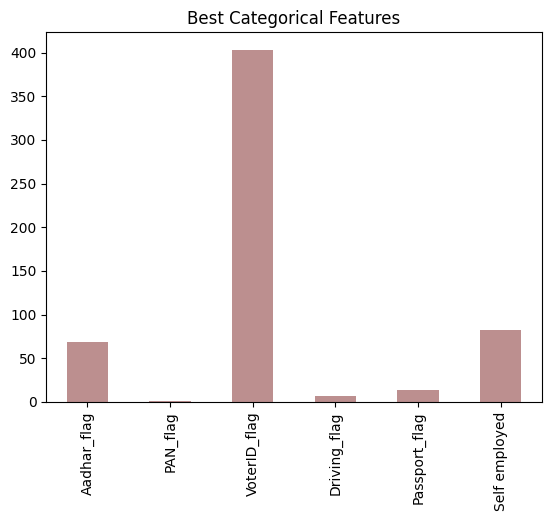

In [30]:
value = chi2(x,y)
print(value[0])
pd.Series(value[0],index = x.columns).plot.bar(color = "rosybrown")
plt.title('Best Categorical Features')
plt.show()

The chi-score should be the highest for acceptance of the variable. Higher chi-score implies that there is higher probability of the null hypothesis (h0) getting rejected,i.e., there is no relationship betweeen the categorical variable and the target variable. Through this exercise we have rejected pan, driving and passport columns which have a very low chi-score 

In [31]:
#dropping these insignificant variable
train_df.drop(["PAN_flag","Driving_flag","Passport_flag"], axis =1, inplace = True)

# Numerical Variables Features

#Difference in Disbursed amount for defaulters and Non-Defaulters

In [32]:
pd.DataFrame([train_df[train_df["loan_default"]==0].disbursed_amount.describe(),train_df[train_df["loan_default"]==1].disbursed_amount.describe()], index = ["Non-Defaulters", "Defaulters"])

count          mean           std      min      25%   
Non-Defaulters  176526.0  53707.242282  12906.119631  13320.0  46349.0  \
Defaulters       48967.0  56163.947454  12099.967718  13369.0  49303.0   

                    50%      75%       max  
Non-Defaulters  53278.0  59847.0  987354.0  
Defaulters      55359.0  61923.0  191392.0

Mean value of disbursed amount for non-defaulters is 53707, for defaulters it is 56163. There is no significant difference between the mean value of them. 
There is no difference between significant standard deviation between non-defaulters and defaulters
There is a significant difference between the maximum value of non-defaulters anf defaulters.
The maximum loan value for non-defaulters is 987354 but for defaulters is 191392.

#Difference in Asset Cost for defaulters and Non-Defaulters

In [33]:
pd.DataFrame([train_df[train_df["loan_default"]==0].asset_cost.describe(),train_df[train_df["loan_default"]==1].asset_cost.describe()], index = ["Non-Defaulters", "Defaulters"])

count          mean           std      min      25%   
Non-Defaulters  176526.0  75478.714484  18506.576196  37000.0  65588.0  \
Defaulters       48967.0  76180.596504  18592.903319  37000.0  65800.0   

                    50%       75%        max  
Non-Defaulters  70696.0  78742.75  1328954.0  
Defaulters      71205.0  79950.00   281164.0

Mean value of asset cost for non-defaulters is 75479, for defaulters it is 76180. There is no significant difference between the mean value of them.
The maximum asset value for non-defaulters is 13,28,954 but for defaulters is 2,81,164.

Defaulters have a lower outstanding balance in their account

Non-defaulters have a higher installment payment

In [115]:
train_df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'MobileNo_Avl_Flag',
       'Aadhar_flag', 'VoterID_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'loan_default', 'Self employed'],
      dtype='object')

In [34]:
# Feature Engineering and created Age at the time of disbursal
train_df['AGE'] = (2000+train_df['DisbursalDate'].str.split("-").str[2].astype(int)) - (1900+train_df['Date.of.Birth'].str.split("-").str[2].astype(int)) 
train_df['AGE'].unique()

array([34, 33, 25, 41, 28, 30, 29, 27, 50, 39, 44, 45, 24, 42, 35, 38, 40,
       32, 46, 49, 52, 22, 36, 47, 23, 54, 51, 48, 21, 43, 37, 31, 56, 53,
       61, 55, 58, 26, 63, 59, 60, 62, 57, 64, 20])

In [36]:
def duration(t):
    year = int(t.split(' ')[0].replace('yrs'," "))
    month = int(t.split(' ')[1].replace('mon'," "))
    time = year*12 + month
    return time

In [37]:
#converting string to age
train_df["CREDIT.LENGTH"] = train_df['CREDIT.HISTORY.LENGTH'].apply(duration)
train_df["ACCT.AGE"] = train_df['AVERAGE.ACCT.AGE'].apply(duration)

In [38]:
pd.DataFrame([train_df[train_df["loan_default"]==0]["CREDIT.LENGTH"].describe(),train_df[train_df["loan_default"]==1]["CREDIT.LENGTH"].describe()], index = ["Non-Defaulters", "Defaulters"])

count       mean        std  min  25%  50%   75%    max
Non-Defaulters  176526.0  17.107848  29.456617  0.0  0.0  1.0  24.0  449.0
Defaulters       48967.0  14.092675  25.531302  0.0  0.0  0.0  21.0  468.0

In [29]:
pd.DataFrame([train_df[train_df["loan_default"]==0]["ACCT.AGE"].describe(),train_df[train_df["loan_default"]==1]["ACCT.AGE"].describe()], index = ["Non-Defaulters", "Defaulters"])

count      mean        std  min  25%  50%   75%    max
Non-Defaulters  176526.0  9.236073  15.321127  0.0  0.0  1.0  13.0  369.0
Defaulters       48967.0  8.279290  14.547651  0.0  0.0  0.0  12.0  188.0

In [39]:
#removing unwanted columns 
train_df.drop(["UniqueID",'branch_id',
      'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
    'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',"AVERAGE.ACCT.AGE", "CREDIT.HISTORY.LENGTH"], axis =1, inplace = True)

In [40]:
train_df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'MobileNo_Avl_Flag',
       'Aadhar_flag', 'VoterID_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'loan_default', 'Self employed', 'AGE',
       'CREDIT.LENGTH', 'ACCT.AGE'],
      dtype='object')

In [41]:
df1 = train_df[['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT', 'loan_default']]

<Axes: >

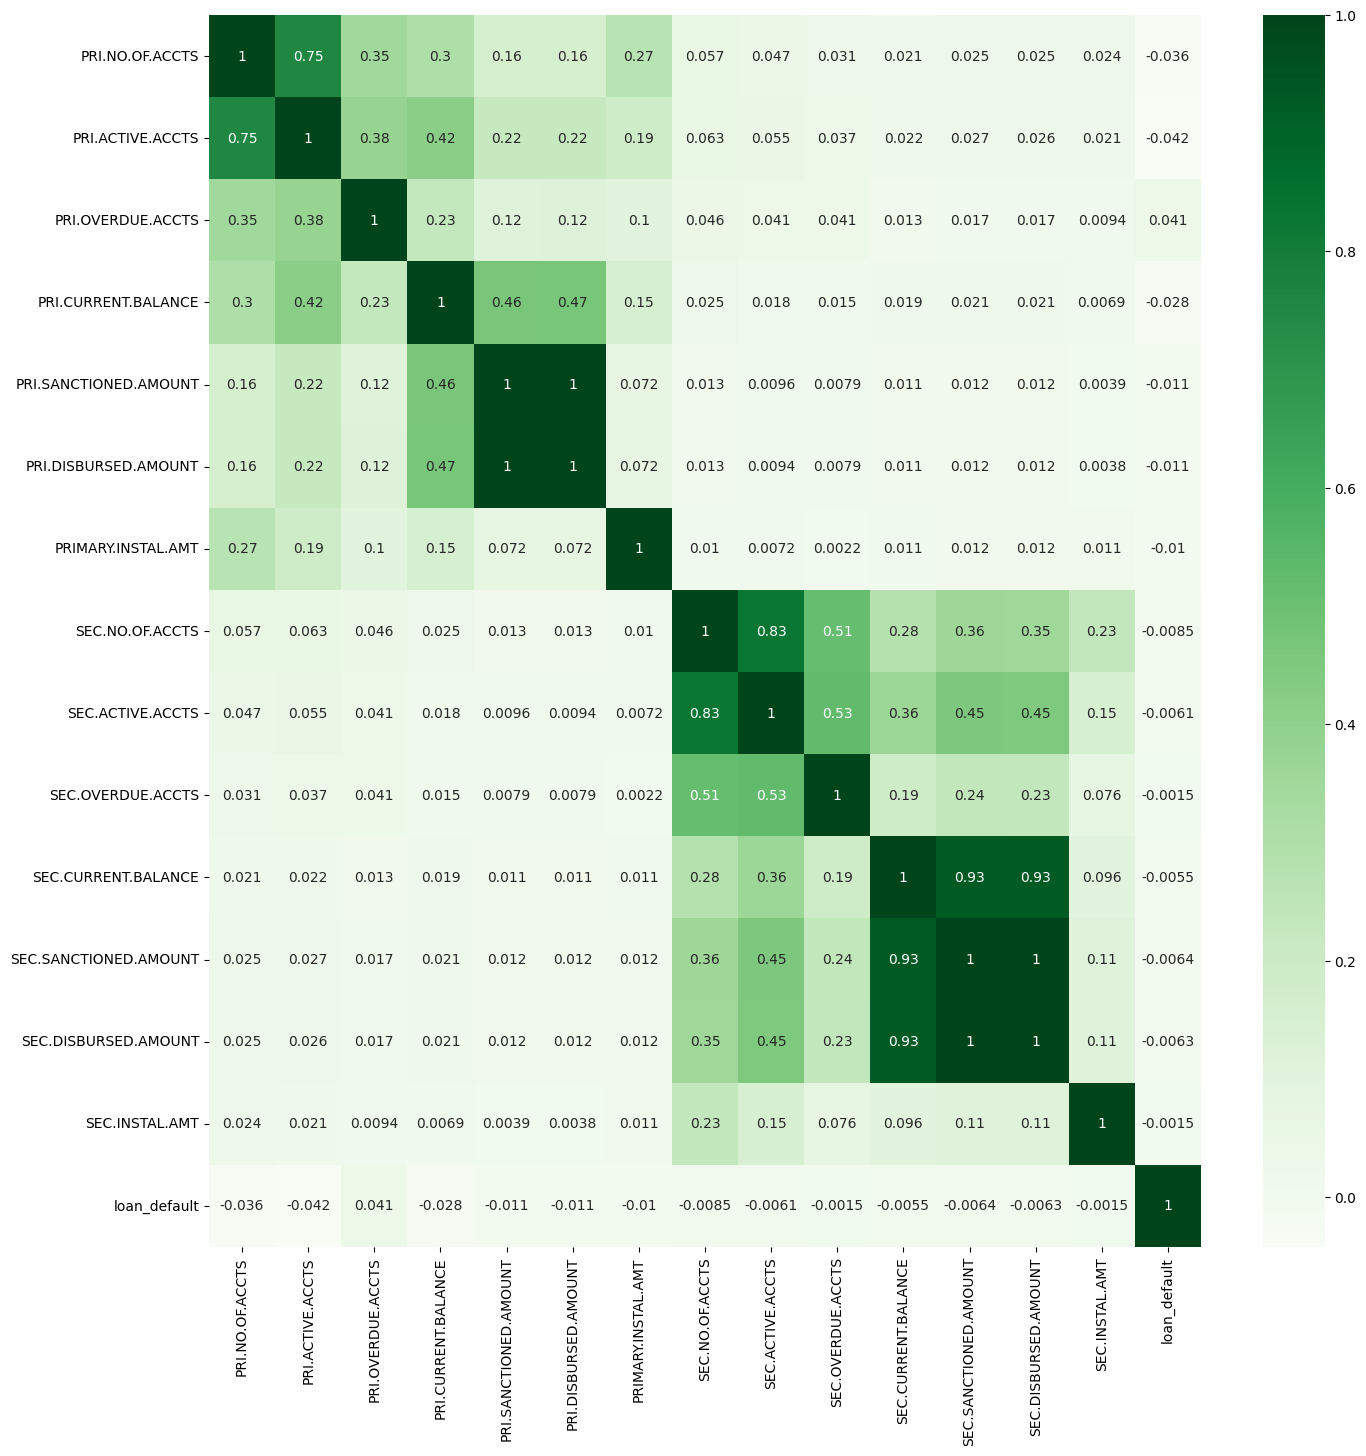

In [42]:
plt.figure(figsize = (16,16))
sb.heatmap(df1.corr(),cmap = "Greens", annot = True)

In [43]:
#Merging Primary and Secondary accounts for the loanee
train_df['TOTAL.NO.OF.ACCTS'] = train_df['PRI.NO.OF.ACCTS'] + train_df['SEC.NO.OF.ACCTS']
train_df['TOTAL.ACTIVE.ACCTS'] = train_df['PRI.ACTIVE.ACCTS'] + train_df['SEC.ACTIVE.ACCTS']
train_df['TOTAL.OVERDUE.ACCTS'] = train_df['PRI.OVERDUE.ACCTS'] + train_df['SEC.OVERDUE.ACCTS']
train_df['TOTAL.CURRENT.BALANCE'] = train_df['PRI.CURRENT.BALANCE'] + train_df['SEC.CURRENT.BALANCE']
train_df['TOTAL.SANCTIONED.AMOUNT'] = train_df['PRI.SANCTIONED.AMOUNT'] + train_df['SEC.SANCTIONED.AMOUNT']
train_df['TOTAL.DISBURSED.AMOUNT'] = train_df['PRI.DISBURSED.AMOUNT'] + train_df['SEC.DISBURSED.AMOUNT']
train_df['TOTAL.INSTAL.AMT'] = train_df['PRIMARY.INSTAL.AMT'] + train_df['SEC.INSTAL.AMT']


In [41]:
train_df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'Self employed', 'AGE', 'CREDIT.LENGTH', 'ACCT.AGE',
       'TOTAL.NO.OF.ACCTS', 'TOTAL.ACTIVE.A

<Axes: >

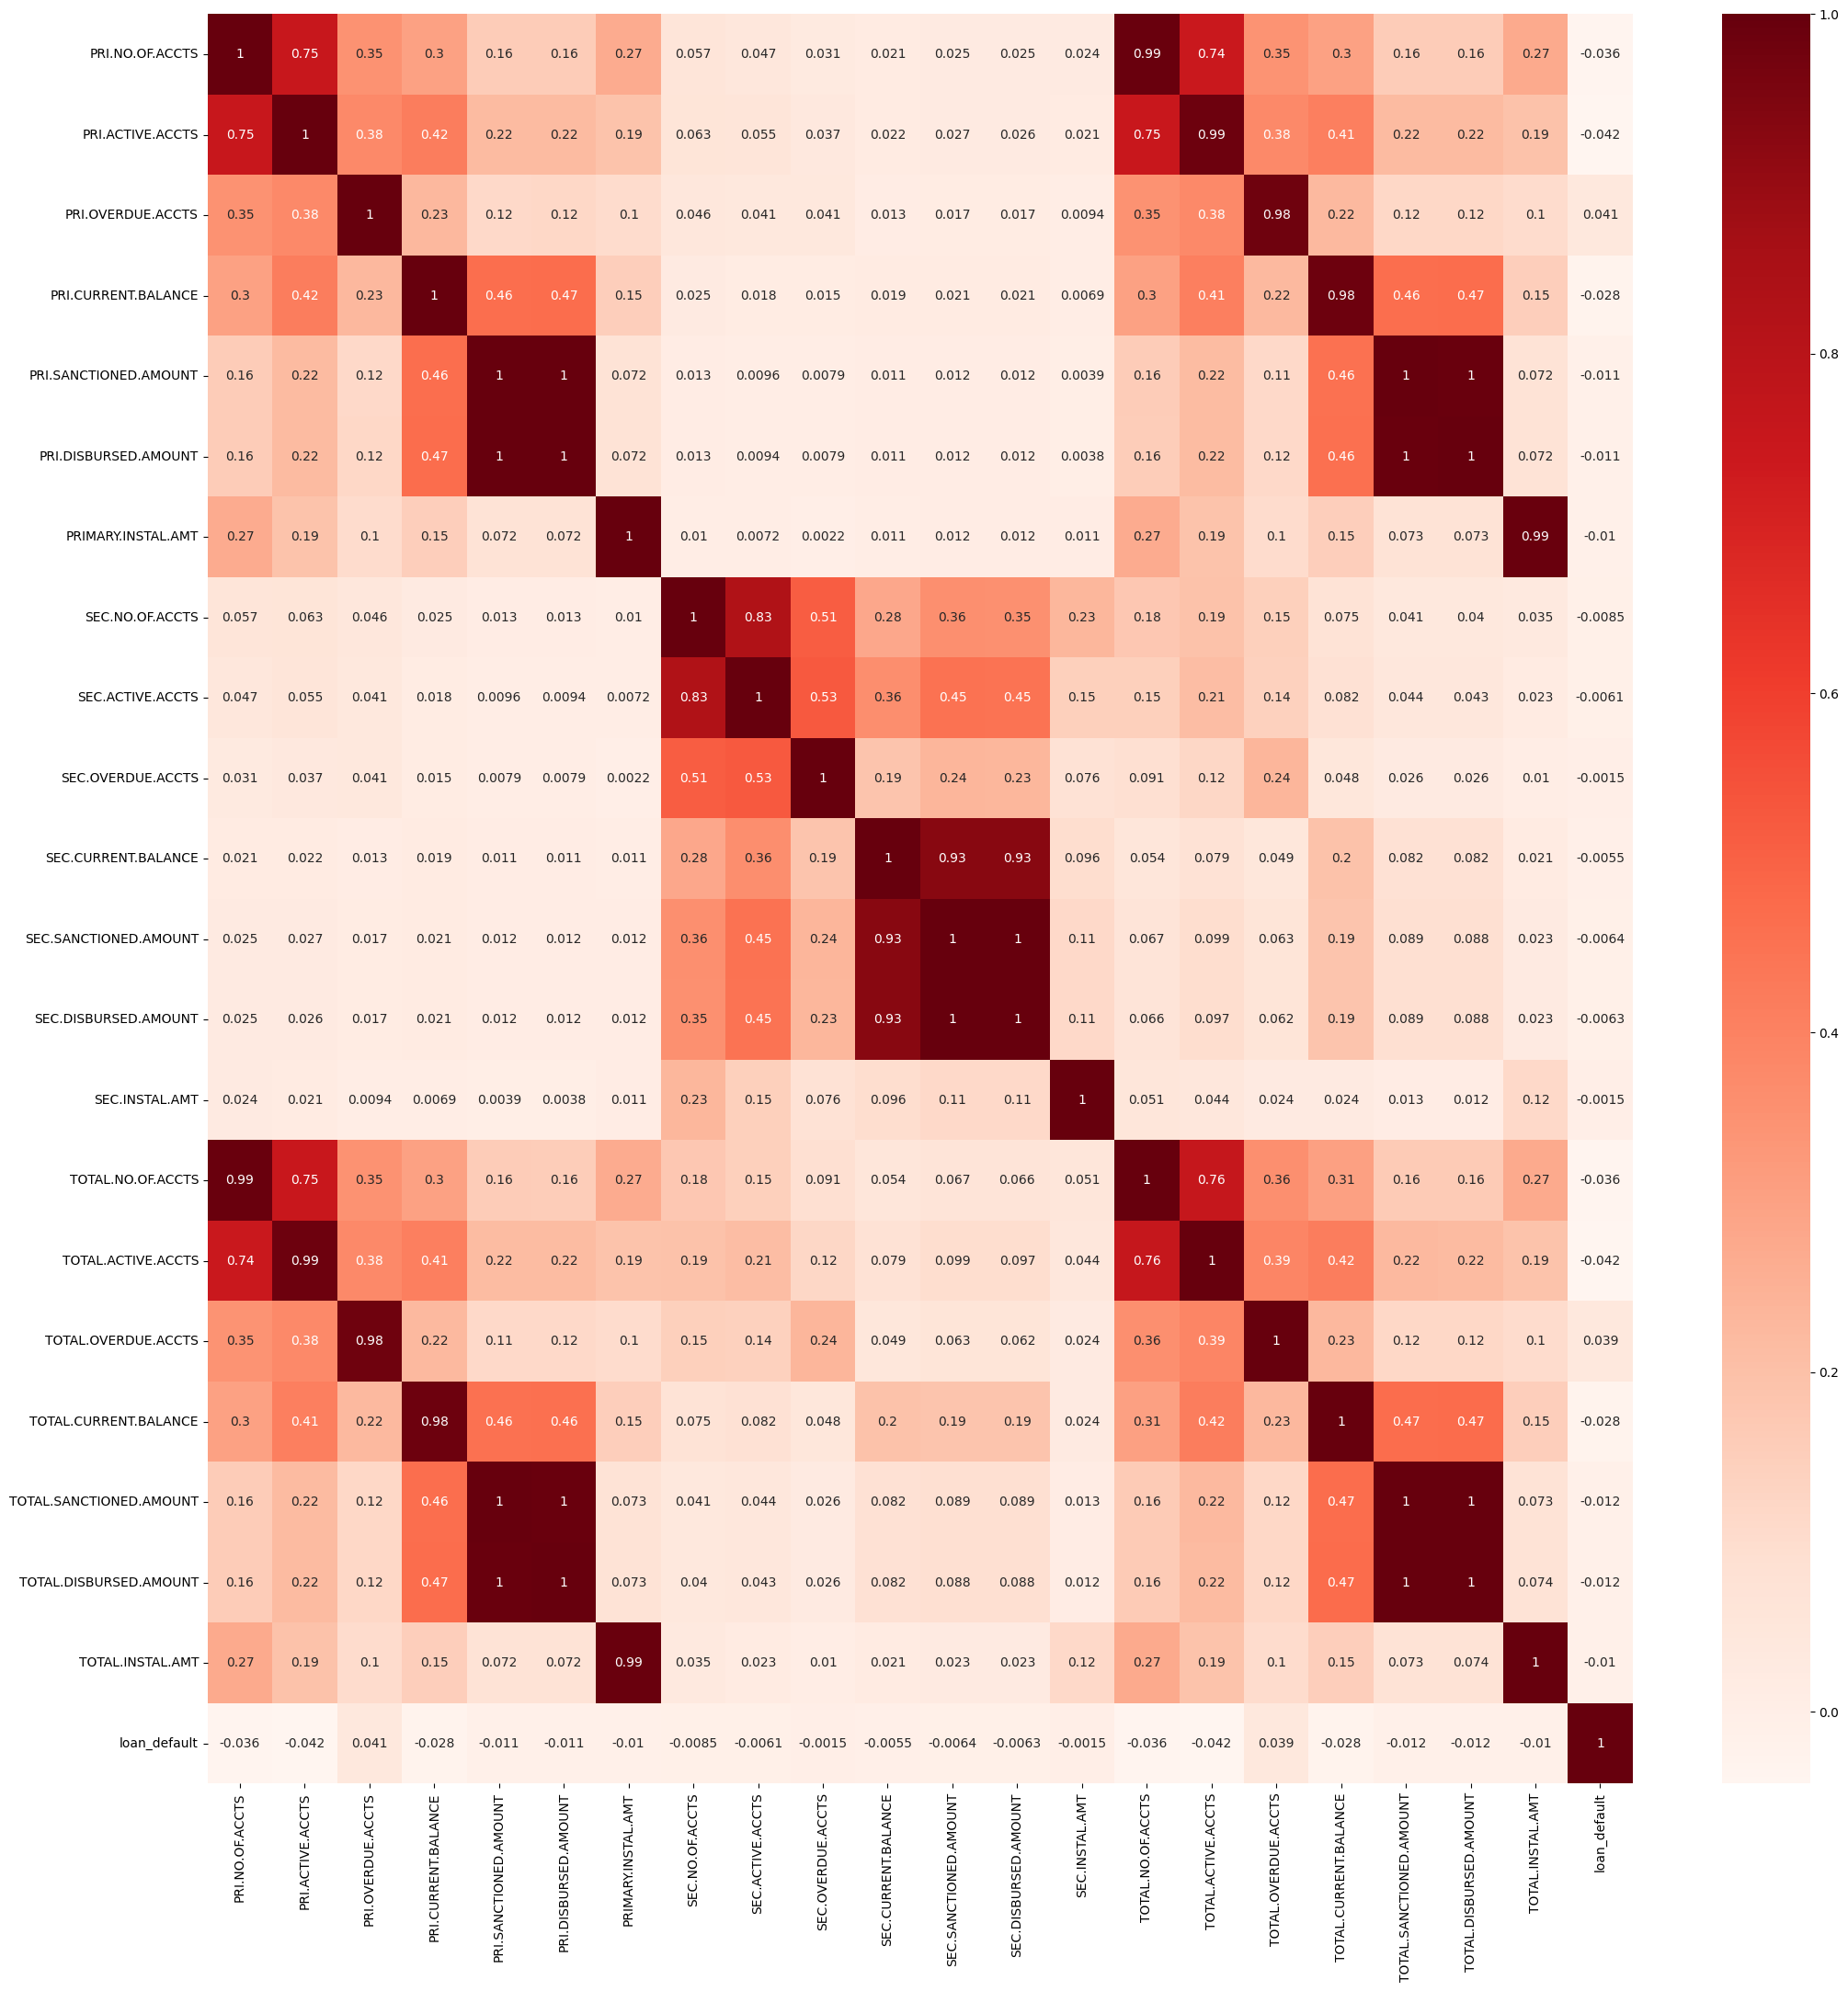

In [44]:
df2 = train_df[['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT','TOTAL.NO.OF.ACCTS', 'TOTAL.ACTIVE.ACCTS', 'TOTAL.OVERDUE.ACCTS',
       'TOTAL.CURRENT.BALANCE', 'TOTAL.SANCTIONED.AMOUNT',
       'TOTAL.DISBURSED.AMOUNT', 'TOTAL.INSTAL.AMT', 'loan_default']]
plt.figure(figsize = (25,25))
sb.heatmap(df2.corr(), cmap = "Reds", annot = True)

There is a higher correlation between primary account features and total account features.
There is also a higher correlation between secondary and total account features
Thus, we can total account features as a summary for primary and secondary account features.
We will remove primary and secondary features from the train_df

In [45]:
pd.set_option('display.max_columns', 500)
train_df.drop(['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT','PERFORM_CNS.SCORE.DESCRIPTION'], axis =1, inplace = True)

In [33]:
train_df

disbursed_amount  asset_cost    ltv  MobileNo_Avl_Flag  Aadhar_flag   
0                  50578       58400  89.55                  1            1  \
1                  47145       65550  73.23                  1            1   
2                  53278       61360  89.63                  1            1   
3                  57513       66113  88.48                  1            1   
4                  52378       60300  88.39                  1            1   
...                  ...         ...    ...                ...          ...   
233149             63213      105405  60.72                  1            0   
233150             73651      100600  74.95                  1            0   
233151             33484       71212  48.45                  1            1   
233152             34259       73286  49.10                  1            1   
233153             75751      116009  66.81                  1            1   

        VoterID_flag  PERFORM_CNS.SCORE  NEW.ACCTS.IN.LAST.SIX.MONTHS   
0                  0                  0                             0  \
1                  0                598                             0   
2                  0                  0                             0   
3                  0                305                             0   
4                  0                  0                             0   
...              ...                ...                           ...   
233149             1                735                             0   
233150             1                825                             0   
233151             0                  0                             0   
233152             0                  0                             0   
233153             0                  0                             0   

        DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  NO.OF_INQUIRIES  loan_default   
0                                         0                0             0  \
1                                         1                0             1   
2                                         0                0             0   
3                                         0                1             1   
4                                         0                1             1   
...                                     ...              ...           ...   
233149                                    0                0             0   
233150                                    0                0             0   
233151                                    0                0             0   
233152                                    0                0             0   
233153                                    0                0             0   

        Self employed  AGE  CREDIT.LENGTH  ACCT.AGE  TOTAL.NO.OF.ACCTS   
0                   0   34              0         0                  0  \
1                   1   33             23        23                  1   
2                   1   33              0         0                  0   
3                   1   25             15         8                  3   
4                   1   41              0         0                  0   
...               ...  ...            ...       ...                ...   
233149              0   30             39        21                  4   
233150              1   30              6         6                  1   
233151              0   42              0         0                  0   
233152              0   24              0         0                  0   
233153              0   34              0         0                  0   

        TOTAL.ACTIVE.ACCTS  TOTAL.OVERDUE.ACCTS  TOTAL.CURRENT.BALANCE   
0                        0                    0                      0  \
1                        1                    1                  27600   
2                        0                    0                      0   
3                        0                    0             

In [246]:
pd.DataFrame([train_df[train_df["loan_default"]==0]["TOTAL.CURRENT.BALANCE"].describe(),train_df[train_df["loan_default"]==1]["TOTAL.CURRENT.BALANCE"].describe()], index = ["Non-Defaulters", "Defaulters"])

count           mean           std        min  25%  50%   
Non-Defaulters  176526.0  188346.544617  1.024681e+06 -6678296.0  0.0  0.0  \
Defaulters       48967.0  122515.563318  7.411186e+05 -2013721.0  0.0  0.0   

                    75%         max  
Non-Defaulters  42037.0  96524920.0  
Defaulters      28243.5  45051160.0

In [31]:
pd.DataFrame([train_df[train_df["loan_default"]==0]["TOTAL.INSTAL.AMT"].describe(),train_df[train_df["loan_default"]==1]["TOTAL.INSTAL.AMT"].describe()], index = ["Non-Defaulters", "Defaulters"])

count          mean            std  min  25%  50%     75%   
Non-Defaulters  176526.0  14149.157422  156777.439035  0.0  0.0  0.0  2174.0  \
Defaulters       48967.0  10322.329303  126401.101189  0.0  0.0  0.0  1971.5   

                       max  
Non-Defaulters  25642806.0  
Defaulters      15420411.0

In [30]:
pd.DataFrame([train_df[train_df["loan_default"]==0]["TOTAL.SANCTIONED.AMOUNT"].describe(),train_df[train_df["loan_default"]==1]["TOTAL.SANCTIONED.AMOUNT"].describe()], index = ["Non-Defaulters", "Defaulters"])

count           mean           std  min  25%  50%      75%   
Non-Defaulters  176526.0  244507.499309  1.268078e+06  0.0  0.0  0.0  75000.0  \
Defaulters       48967.0  175687.289603  4.603529e+06  0.0  0.0  0.0  51036.0   

                         max  
Non-Defaulters  1.058657e+08  
Defaulters      1.000000e+09

In [32]:
pd.DataFrame([train_df[train_df["loan_default"]==0]["AGE"].describe(),train_df[train_df["loan_default"]==1]["AGE"].describe()], index = ["Non-Defaulters", "Defaulters"])

count       mean       std   min   25%   50%   75%   max
Non-Defaulters  176526.0  34.636609  9.697518  20.0  27.0  33.0  41.0  64.0
Defaulters       48967.0  33.768109  9.521842  21.0  26.0  32.0  40.0  64.0

Average age of defaulters is 33 and for non-defaulters is 34 but there is no signifivant difference between them

In [46]:
# number of accounts defaulted in the last six months
pd.DataFrame([train_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize = True)*100]).T

proportion
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS            
0                                     92.085785
1                                      6.510180
2                                      1.066552
3                                      0.230162
4                                      0.060312
5                                      0.024834
6                                      0.008869
7                                      0.005322
8                                      0.003104
12                                     0.001330
11                                     0.001330
9                                      0.000887
10                                     0.000887
20                                     0.000443

92% of the loans given in the past 12 months were not defaulted only remaining 8% loans were defaulted upon.

In [47]:
pd.DataFrame([train_df['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize = True)*100]).T.head()

proportion
NEW.ACCTS.IN.LAST.SIX.MONTHS            
0                              77.582896
1                              13.907749
2                               4.792166
3                               1.940193
4                               0.850581

77% people have not taken new loans in the last 6 months, 13% of people have taken 1 loan and remaining 10% people have taken higher number of loans

In [46]:
(pd.DataFrame([train_df['NO.OF_INQUIRIES'].value_counts(normalize = True)*100]).T).head()

proportion
NO.OF_INQUIRIES            
0                 86.472751
1                  9.665045
2                  2.347745
3                  0.764547
4                  0.330387

86% of the customers have not made any enquires. May be the companies advertising is not affective

In [76]:
pd.DataFrame([train_df[train_df["loan_default"]==0]['NO.OF_INQUIRIES'].describe(),train_df[train_df["loan_default"]==1]['NO.OF_INQUIRIES'].describe()], index = ["Non-Defaulters", "Defaulters"])

count      mean       std  min  25%  50%  75%   max
Non-Defaulters  176526.0  0.192448  0.668739  0.0  0.0  0.0  0.0  36.0
Defaulters       48967.0  0.267956  0.839814  0.0  0.0  0.0  0.0  19.0

In [86]:
train_df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'MobileNo_Avl_Flag',
       'Aadhar_flag', 'VoterID_flag', 'PERFORM_CNS.SCORE',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'loan_default', 'AGE', 'CREDIT.LENGTH', 'ACCT.AGE',
       'TOTAL.NO.OF.ACCTS', 'TOTAL.ACTIVE.ACCTS', 'TOTAL.OVERDUE.ACCTS',
       'TOTAL.CURRENT.BALANCE', 'TOTAL.SANCTIONED.AMOUNT',
       'TOTAL.DISBURSED.AMOUNT', 'TOTAL.INSTAL.AMT'],
      dtype='object')

In [47]:
df3 = train_df[['disbursed_amount', 'asset_cost', 'ltv','PERFORM_CNS.SCORE',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'CREDIT.LENGTH', 'ACCT.AGE', 'TOTAL.NO.OF.ACCTS', 'TOTAL.ACTIVE.ACCTS',
       'TOTAL.OVERDUE.ACCTS', 'TOTAL.CURRENT.BALANCE', 'TOTAL.SANCTIONED.AMOUNT', 'TOTAL.DISBURSED.AMOUNT',
       'TOTAL.INSTAL.AMT' ]]

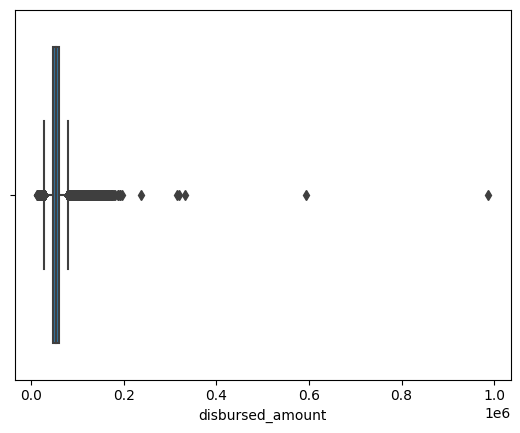

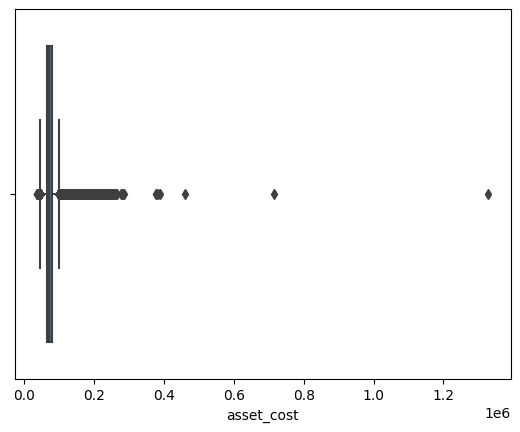

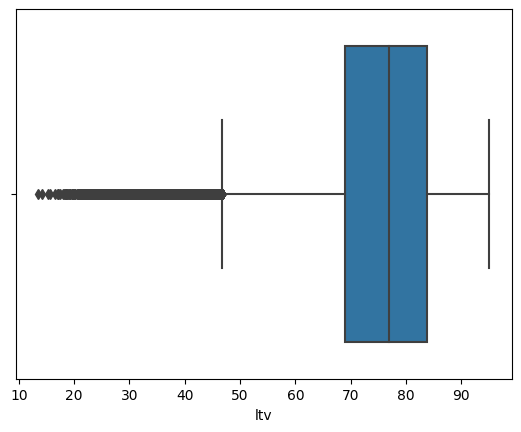

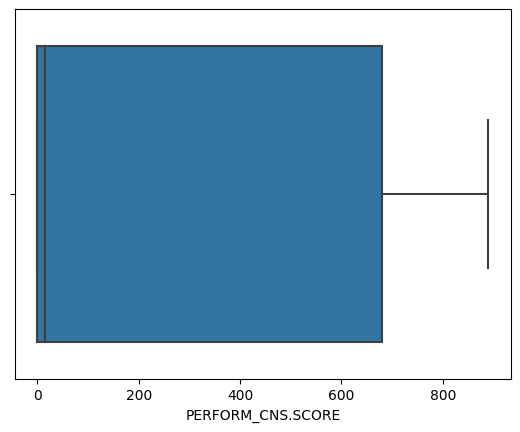

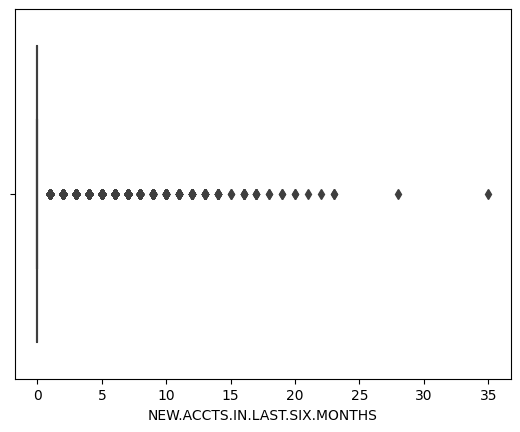

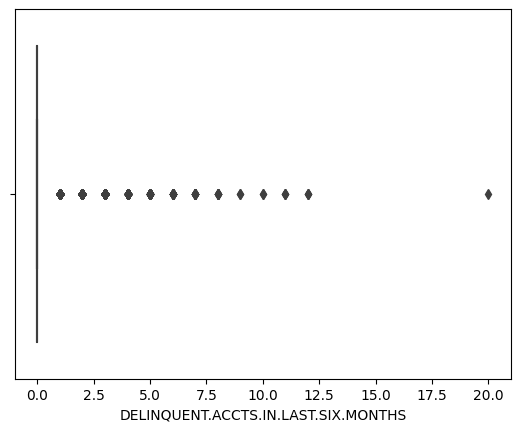

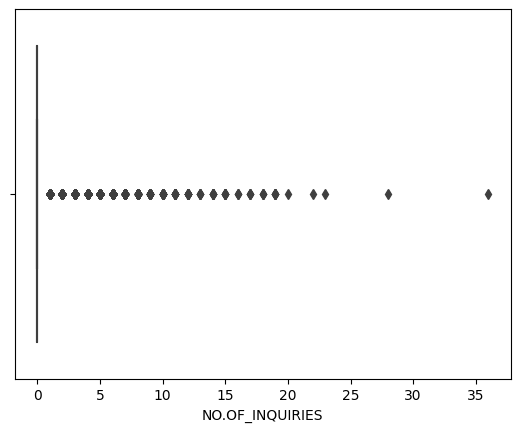

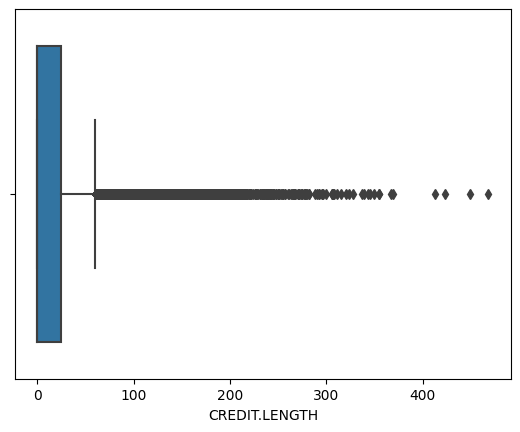

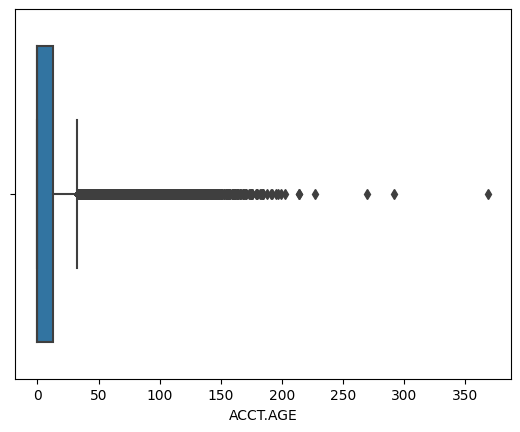

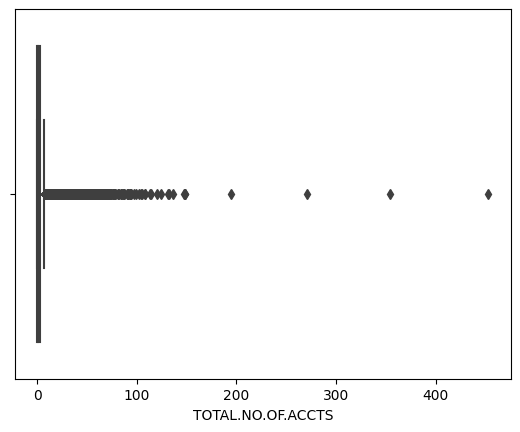

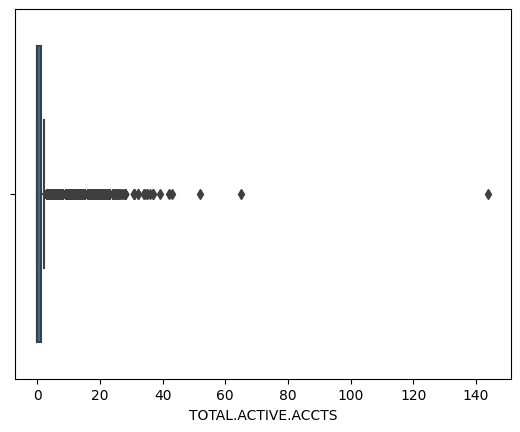

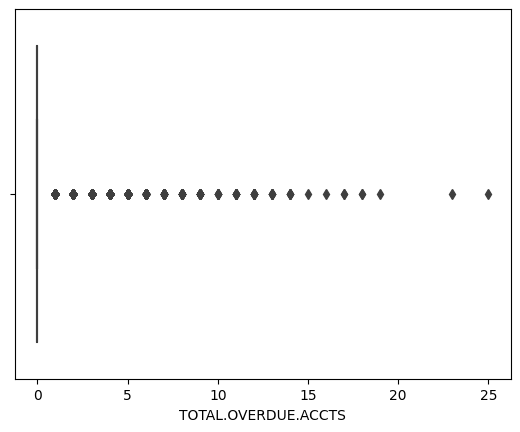

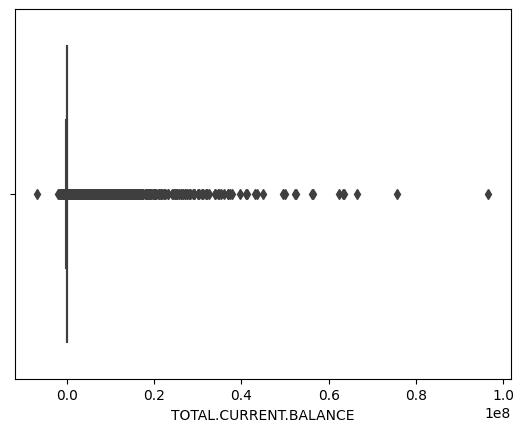

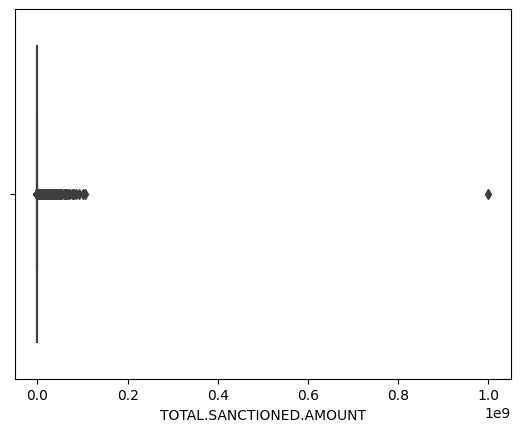

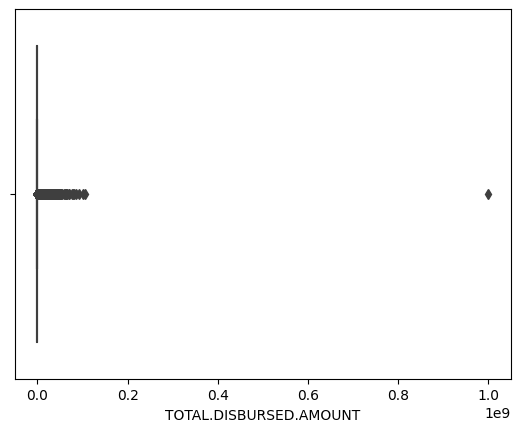

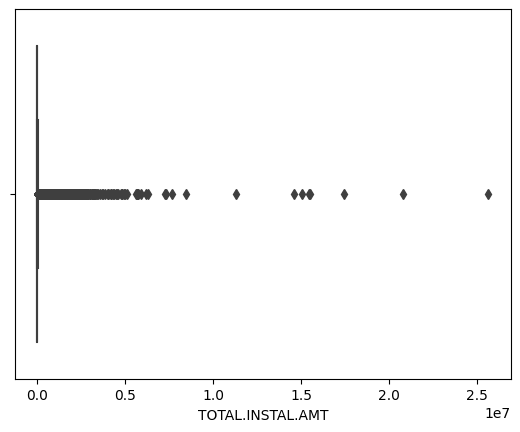

In [74]:
for i in df3.columns:
    sb.boxplot(x = df3[i])
    plt.show()

In [48]:
c = 0
for j in train_df.select_dtypes(include = 'number'):
    u = (train_df[j] > (train_df[j].quantile(0.75) + 1.5 * (train_df[j].quantile(0.75) - train_df[j].quantile(0.25)))).sum()
    l = (train_df[j] < (train_df[j].quantile(0.25) - 1.5 * (train_df[j].quantile(0.75) - train_df[j].quantile(0.25)))).sum()
    print(j,u+l)
    c = 0


disbursed_amount 9546
asset_cost 23602
ltv 5975
MobileNo_Avl_Flag 0
Aadhar_flag 36593
VoterID_flag 33176
PERFORM_CNS.SCORE 0
NEW.ACCTS.IN.LAST.SIX.MONTHS 50549
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS 17846
NO.OF_INQUIRIES 30503
loan_default 48967
Self employed 0
AGE 21
CREDIT.LENGTH 15719
ACCT.AGE 15617
TOTAL.NO.OF.ACCTS 22027
TOTAL.ACTIVE.ACCTS 32814
TOTAL.OVERDUE.ACCTS 26737
TOTAL.CURRENT.BALANCE 39588
TOTAL.SANCTIONED.AMOUNT 38461
TOTAL.DISBURSED.AMOUNT 38681
TOTAL.INSTAL.AMT 37494


In [24]:
c = 0
for j in df3.select_dtypes(include = 'number'):
    u = (df3[j] > (df3[j].quantile(0.75) + 1.5 * (df3[j].quantile(0.75) - df3[j].quantile(0.25)))).sum()
    l = (df3[j] < (df3[j].quantile(0.25) - 1.5 * (df3[j].quantile(0.75) - df3[j].quantile(0.25)))).sum()
    print(j,u+l)
    c = 0

disbursed_amount 9546
asset_cost 23602
ltv 5975
PERFORM_CNS.SCORE 0
NEW.ACCTS.IN.LAST.SIX.MONTHS 50549
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS 17846
NO.OF_INQUIRIES 30503
CREDIT.LENGTH 15719
ACCT.AGE 15617
TOTAL.NO.OF.ACCTS 22027
TOTAL.ACTIVE.ACCTS 32814
TOTAL.OVERDUE.ACCTS 26737
TOTAL.CURRENT.BALANCE 39588
TOTAL.SANCTIONED.AMOUNT 38461
TOTAL.DISBURSED.AMOUNT 38681
TOTAL.INSTAL.AMT 37494


In [85]:
train_df

disbursed_amount  asset_cost    ltv  MobileNo_Avl_Flag  Aadhar_flag   
0                  50578       58400  89.55                  1            1  \
1                  47145       65550  73.23                  1            1   
2                  53278       61360  89.63                  1            1   
3                  57513       66113  88.48                  1            1   
4                  52378       60300  88.39                  1            1   
...                  ...         ...    ...                ...          ...   
233149             63213      105405  60.72                  1            0   
233150             73651      100600  74.95                  1            0   
233151             33484       71212  48.45                  1            1   
233152             34259       73286  49.10                  1            1   
233153             75751      116009  66.81                  1            1   

        VoterID_flag  PERFORM_CNS.SCORE  NEW.ACCTS.IN.LAST.SIX.MONTHS   
0                  0                  0                             0  \
1                  0                598                             0   
2                  0                  0                             0   
3                  0                305                             0   
4                  0                  0                             0   
...              ...                ...                           ...   
233149             1                735                             0   
233150             1                825                             0   
233151             0                  0                             0   
233152             0                  0                             0   
233153             0                  0                             0   

        DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  NO.OF_INQUIRIES  loan_default   
0                                         0                0             0  \
1                                         1                0             1   
2                                         0                0             0   
3                                         0                1             1   
4                                         0                1             1   
...                                     ...              ...           ...   
233149                                    0                0             0   
233150                                    0                0             0   
233151                                    0                0             0   
233152                                    0                0             0   
233153                                    0                0             0   

        AGE  CREDIT.LENGTH  ACCT.AGE  TOTAL.NO.OF.ACCTS  TOTAL.ACTIVE.ACCTS   
0        34              0         0                  0                   0  \
1        33             23        23                  1                   1   
2        33              0         0                  0                   0   
3        25             15         8                  3                   0   
4        41              0         0                  0                   0   
...     ...            ...       ...                ...                 ...   
233149   30             39        21                  4                   3   
233150   30              6         6                  1                   0   
233151   42              0         0                  0                   0   
233152   24              0         0                  0                   0   
233153   34              0         0                  0                   0   

        TOTAL.OVERDUE.ACCTS  TOTAL.CURRENT.BALANCE  TOTAL.SANCTIONED.AMOUNT   
0                         0                      0                        0  \
1                         1                  27600                    50200   
2                         0                      0         

In [49]:
x1 = train_df[['disbursed_amount', 'asset_cost', 'ltv', 'PERFORM_CNS.SCORE',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES','AGE', 'CREDIT.LENGTH', 'ACCT.AGE',
       'TOTAL.NO.OF.ACCTS', 'TOTAL.ACTIVE.ACCTS', 'TOTAL.OVERDUE.ACCTS',
       'TOTAL.CURRENT.BALANCE', 'TOTAL.SANCTIONED.AMOUNT',
       'TOTAL.DISBURSED.AMOUNT', 'TOTAL.INSTAL.AMT']]
y1 = train_df[['loan_default']]

H0: There is no difference between the mean value of non-defaulters and defaulters 
H1: There is a significant difference between the mean value of non-defaulters and defaulters

We use this for feature selection. We would only want to select those features which have a significant difference between them, this will help us estmate the model more. Higher the F-score higher will be the variance between the means of 2 groups. (since F = Variance Between/Variance Within) Therefore, we select F with higher values

In [50]:
from sklearn.feature_selection import SelectKBest, f_classif
value = f_classif(x1,y1)
df4 = pd.DataFrame(value, columns = x1.columns).T
df4

C:\Users\HP\.conda\envs\baclass\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0              1
disbursed_amount                     1426.461439  3.542799e-311
asset_cost                             55.026792   1.193122e-13
ltv                                  2186.428503   0.000000e+00
PERFORM_CNS.SCORE                     807.353769  2.799674e-177
NEW.ACCTS.IN.LAST.SIX.MONTHS          204.653574   2.112154e-46
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS   268.811933   2.232899e-60
NO.OF_INQUIRIES                       434.292291   2.332374e-96
AGE                                   309.882066   2.578743e-69
CREDIT.LENGTH                         424.575844   3.010016e-94
ACCT.AGE                              152.758983   4.439402e-35
TOTAL.NO.OF.ACCTS                     300.270306   3.180856e-67
TOTAL.ACTIVE.ACCTS                    405.485279   4.230001e-90
TOTAL.OVERDUE.ACCTS                   352.334027   1.509823e-78
TOTAL.CURRENT.BALANCE                 176.497871   2.919301e-40
TOTAL.SANCTIONED.AMOUNT                30.977839   2.612870e-08
TOTAL.DISBURSED.AMOUNT                 30.113073   4.080113e-08
TOTAL.INSTAL.AMT                       24.718170   6.640419e-07

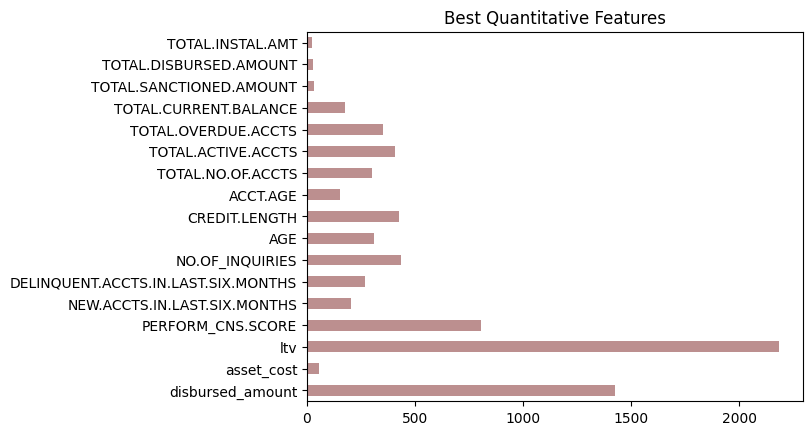

In [51]:
pd.Series(value[0],index = x1.columns).plot.barh(color = "rosybrown")
plt.title('Best Quantitative Features')
plt.show()

In [52]:
# selecting values having a score greater than 300

df4[df4[0]>= 250]

0              1
disbursed_amount                     1426.461439  3.542799e-311
ltv                                  2186.428503   0.000000e+00
PERFORM_CNS.SCORE                     807.353769  2.799674e-177
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS   268.811933   2.232899e-60
NO.OF_INQUIRIES                       434.292291   2.332374e-96
AGE                                   309.882066   2.578743e-69
CREDIT.LENGTH                         424.575844   3.010016e-94
TOTAL.NO.OF.ACCTS                     300.270306   3.180856e-67
TOTAL.ACTIVE.ACCTS                    405.485279   4.230001e-90
TOTAL.OVERDUE.ACCTS                   352.334027   1.509823e-78

In [53]:
train_df.drop(['asset_cost', 'NEW.ACCTS.IN.LAST.SIX.MONTHS','ACCT.AGE','TOTAL.CURRENT.BALANCE', 'TOTAL.SANCTIONED.AMOUNT',
       'TOTAL.DISBURSED.AMOUNT', 'TOTAL.INSTAL.AMT'], axis = 1, inplace = True)

In [72]:
train_df.shape

(225493, 15)

# Model Building

In [54]:
X = train_df.drop('loan_default', axis =1)
Y_train = train_df['loan_default']
print(X.shape , Y_train.shape)
num = ['disbursed_amount', 'ltv', 'PERFORM_CNS.SCORE',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 'AGE', 'CREDIT.LENGTH',
       'TOTAL.NO.OF.ACCTS', 'TOTAL.ACTIVE.ACCTS', 'TOTAL.OVERDUE.ACCTS']
cat = ['MobileNo_Avl_Flag', 'Aadhar_flag',
       'VoterID_flag','Self employed' ]

(225493, 14) (225493,)


We do not standardize the categorical varaible as it does not make any sense

In [55]:
#Standardising only the numeric variables 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_num = pd.DataFrame(data = scaler.fit_transform(X[num]), columns = num)
x_cat = pd.DataFrame(data = X[cat], columns = cat)
X_train = pd.concat([x_num.reset_index(drop=True), x_cat.reset_index(drop=True)], axis=1)

In [56]:
X_train 

disbursed_amount       ltv  PERFORM_CNS.SCORE   
0              -0.286698  1.288546          -0.864747  \
1              -0.555414 -0.137795           0.899920   
2              -0.075357  1.295538          -0.864747   
3               0.256135  1.195029           0.035292   
4              -0.145804  1.187164          -0.864747   
...                  ...       ...                ...   
225488          0.702300 -1.231148           1.304200   
225489          1.519328  0.012530           1.569786   
225490         -1.624721 -2.303526          -0.864747   
225491         -1.564059 -2.246717          -0.864747   
225492          1.683705 -0.698893          -0.864747   

        DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  NO.OF_INQUIRIES       AGE   
0                                 -0.255472        -0.294113 -0.046348  \
1                                  2.332684        -0.294113 -0.149801   
2                                 -0.255472        -0.294113 -0.149801   
3                                 -0.255472         1.114172 -0.977424   
4                                 -0.255472         1.114172  0.677823   
...                                     ...              ...       ...   
225488                            -0.255472        -0.294113 -0.460160   
225489                            -0.255472        -0.294113 -0.460160   
225490                            -0.255472        -0.294113  0.781275   
225491                            -0.255472        -0.294113 -1.080877   
225492                            -0.255472        -0.294113 -0.046348   

        CREDIT.LENGTH  TOTAL.NO.OF.ACCTS  TOTAL.ACTIVE.ACCTS   
0           -0.573742          -0.476207           -0.542279  \
1            0.228300          -0.287422           -0.041088   
2           -0.573742          -0.476207           -0.542279   
3           -0.050671           0.090148           -0.542279   
4           -0.573742          -0.476207           -0.542279   
...               ...                ...                 ...   
225488       0.786242           0.278933            0.961294   
225489      -0.364514          -0.287422           -0.542279   
225490      -0.573742          -0.476207           -0.542279   
225491      -0.573742          -0.476207           -0.542279   
225492      -0.573742          -0.476207           -0.542279   

        TOTAL.OVERDUE.ACCTS  MobileNo_Avl_Flag  Aadhar_flag  VoterID_flag   
0                 -0.292246                  1            1             0  \
1                  1.464559                  1            1             0   
2                 -0.292246                  1            1             0   
3                 -0.292246                  1            1             0   
4                 -0.292246                  1            1             0   
...                     ...                ...          ...           ...   
225488            -0.292246                  1            0             1   
225489            -0.292246                  1            0             1   
225490            -0.292246                  1            1             0   
225491            -0.292246                  1            1             0   
225492            -0.292246                  1            1             0   

        Self employed  
0                   0  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
225488              0  
225489              1  
225490              0  
225491              0  
225492              0  

[225493 rows x 14 columns]

In [57]:
X_train.shape, Y_train.shape, x_num.shape, x_cat.shape

((225493, 14), (225493,), (225493, 10), (225493, 4))

In [17]:
Y_train = Y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop = True)
#X_train1 = X_train1.reset_index(drop=True)

In [59]:
# using sklearn to perform logistic regression
from sklearn.linear_model import LogisticRegression

#creating the model
logit = LogisticRegression()

#fitting the model 
model = logit.fit(X_train, Y_train)

#predicting the model
Y_pred = logit.predict(X_train)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
#predicting the accuracy of the model
from sklearn.metrics import confusion_matrix,roc_auc_score,log_loss,roc_curve,accuracy_score, precision_score, recall_score, classification_report

print(accuracy_score(Y_train,Y_pred)*100)
print(roc_auc_score(Y_train, Y_pred)*100)

78.24544442621279
50.12633403959551


In [45]:
print(classification_report(Y_train, Y_pred))
print(precision_score(Y_train, Y_pred))
print(recall_score(Y_train, Y_pred, pos_label =0))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    176526
           1       0.41      0.00      0.01     48967

    accuracy                           0.78    225493
   macro avg       0.60      0.50      0.44    225493
weighted avg       0.70      0.78      0.69    225493

0.41164658634538154
0.9983401878476825


The above logistic regression model has an accuracy of 78% on the train_dataset

[[ 48762    205]
 [176233    293]]


<Axes: >

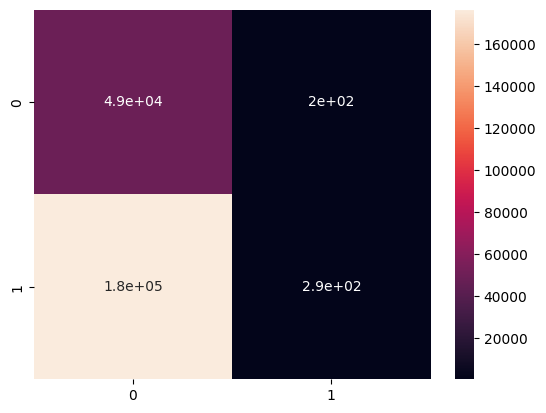

In [21]:
print(np.flip(confusion_matrix(Y_train,Y_pred), axis =0))
sb.heatmap((np.flip(confusion_matrix(Y_train,Y_pred), axis =0)), annot = True)

<Axes: >

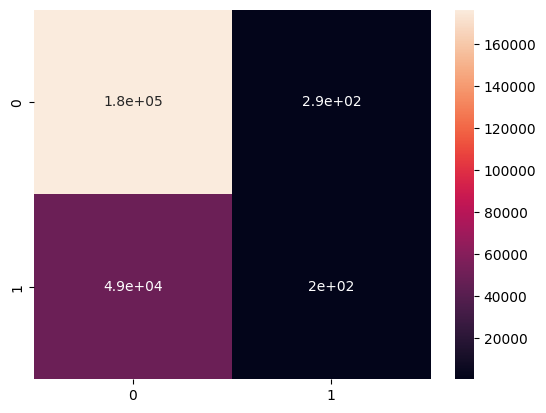

In [22]:
sb.heatmap(confusion_matrix(Y_train,Y_pred), annot = True)

Estimating the model using SMOTE 
SMOTE will help in reducing the imbalance in the dataset. Since there is more values of non-defaulters in the dataset.

In [23]:
from imblearn.over_sampling import SMOTE

counter = Y_train.value_counts()
print("Before", counter)

#oversampling the training dataset 
smt = SMOTE()

X_train_sm, Y_train_sm = smt.fit_resample(X_train, Y_train)
print("After", Y_train_sm.value_counts())

Before loan_default
0    176526
1     48967
Name: count, dtype: int64
After loan_default
0    176526
1    176526
Name: count, dtype: int64


In [46]:
#fitting the SMOTE dataset into the model 
logit.fit(X_train_sm, Y_train_sm)

#predicting the model
Y_pred_sm = logit.predict(X_train_sm)
Y_pred_sm

#predicting the accoracy of the SMOTE model
print(accuracy_score(Y_train_sm,Y_pred_sm)*100)
print(roc_auc_score(Y_train_sm,Y_pred_sm)*100)

59.021333967800786
59.021333967800786


[[ 95362  81164]
 [ 63512 113014]]
              precision    recall  f1-score   support

           0       0.60      0.54      0.57    176526
           1       0.58      0.64      0.61    176526

    accuracy                           0.59    353052
   macro avg       0.59      0.59      0.59    353052
weighted avg       0.59      0.59      0.59    353052



<Axes: >

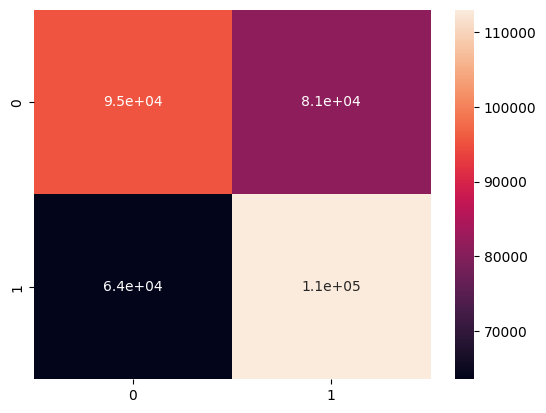

In [25]:
#Creating the confusion Matrix
print(confusion_matrix(Y_train_sm,Y_pred_sm))
print(classification_report(Y_train_sm, Y_pred_sm))
sb.heatmap(confusion_matrix(Y_train_sm,Y_pred_sm), annot = True)

In [26]:
# Estimating the model using random sampling in which ratio of minority:majority will be 1:2
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 0.5)

#strategy = 0.5 means that if the minority class will have 500 samples the majority class will have 1000 samples
print('Before', Y_train.value_counts(normalize = True)*100)

#Generating Data
X_train_rs , Y_train_rs = oversample.fit_resample(X_train,Y_train)

print('After', Y_train_rs.value_counts(normalize = True)*100)


Before loan_default
0    78.28447
1    21.71553
Name: proportion, dtype: float64
After loan_default
0    66.666667
1    33.333333
Name: proportion, dtype: float64


In [47]:
#fitting the Random sampled dataset into the model 
logit.fit(X_train_rs, Y_train_rs)

#predicting the model
Y_pred_rs = logit.predict(X_train_rs)
Y_pred_rs

#predicting the accoracy of the SMOTE model
print(accuracy_score(Y_train_rs,Y_pred_rs)*100)
print(roc_auc_score(Y_train_rs,Y_pred_rs)*100)

66.89288452314862
51.356457405707935


[[172935   3591]
 [ 84073   4190]]
              precision    recall  f1-score   support

           0       0.67      0.98      0.80    176526
           1       0.54      0.05      0.09     88263

    accuracy                           0.67    264789
   macro avg       0.61      0.51      0.44    264789
weighted avg       0.63      0.67      0.56    264789



<Axes: >

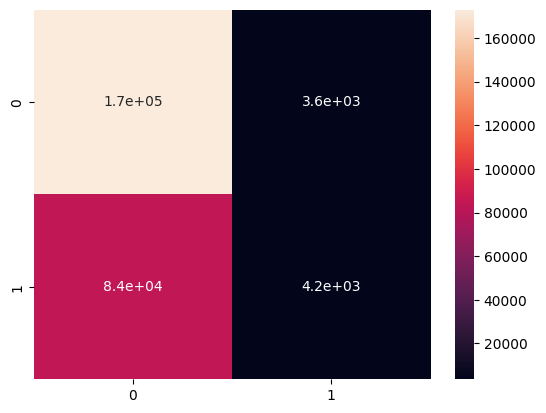

In [28]:
print(confusion_matrix(Y_train_rs,Y_pred_rs))
print(classification_report(Y_train_rs, Y_pred_rs))
sb.heatmap(confusion_matrix(Y_train_rs,Y_pred_rs), annot = True)

With random sampling the accuracy score improces over smote 
smote has 50-50 
random sampling - 66-33
original data - 79-21

In [110]:
#adding the model
X_train1 = sm.add_constant(X_train_sm)

# creating the model, training it and fitting the data
model = sm.Logit(Y_train_sm,X_train1).fit()

#getting the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.669391
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           loan_default   No. Observations:               353052
Model:                          Logit   Df Residuals:                   353038
Method:                           MLE   Df Model:                           13
Date:                Thu, 20 Jul 2023   Pseudo R-squ.:                 0.03427
Time:                        15:36:52   Log-Likelihood:            -2.3633e+05
converged:                       True   LL-Null:                   -2.4472e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
disbursed_amount                        0.1104      0.004     28.522      0.000       0.103       0.118
ltv                                     0.2755      0.004     68.001      0.000       0.268       0.283
PERFORM_CNS.SCORE                      -0.0786      0.004    -17.885      0.000      -0.087      -0.070
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS     0.1055      0.004     24.944      0.000       0.097       0.114
NO.OF_INQUIRIES                         0.1194      0.004     32.307      0.000       0.112       0.127
AGE                                    -0.0877      0.004    -23.789      0.000      -0.095      -0.081
CREDIT.LENGTH                          -0.0937      0.005    -18.416      0.000      -0.104      -0.084
TOTAL.NO.OF.ACCTS                      -0.0549      0.006     -8.868      0.000      -0.067      -0.043
TOTAL.ACTIVE.ACCTS                     -0.1619      0.007    -24.055      0.000      -0.175      -0.149
TOTAL.OVERDUE.ACCTS                     0.1725      0.005     36.466      0.000       0.163       0.182
MobileNo_Avl_Flag                       0.2404      0.019     12.648      0.000       0.203       0.278
Aadhar_flag                            -0.4308      0.019    -22.937      0.000      -0.468      -0.394
VoterID_flag                           -0.1260      0.020     -6.394      0.000      -0.165      -0.087
Self employed                           0.1386      0.007     19.538      0.000       0.125       0.153
=======================================================================================================
"""

In [113]:
X_train['disbursed_amount'].std()

1.0000022173711067

OBSERVATIONS- 
'disbursed_amount', 'ltv','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 'MobileNo_Avl_Flag','Self employed' have a positive relationship with the logit of loan default. 

'PERFORM_CNS.SCORE', 'AGE', 'CREDIT.LENGTH', 'TOTAL.NO.OF.ACCTS', 'TOTAL.ACTIVE.ACCTS', 'TOTAL.OVERDUE.ACCTS', 'Aadhar_flag','VoterID_flag' have a negative relationship with the logit of loan default

All the coefficients are statistically significant as the p-values are less than 0.05. This means all the variables play a significant role in explaining the relationship between the log-odds of loan default. 

The log-likelihood is a measure of how well the model fits the observed data. Maximizing the log-likelihood is equivalent to minimizing the cross-entropy loss, which is a common loss function used in logistic regression.
In summary, the log-likelihood of logistic regression quantifies the goodness of fit of the model to the data and plays a central role in parameter estimation and model optimization. By maximizing the log-likelihood, logistic regression finds the best-fitting model that explains the observed data and predicts the probability of the positive class.

Disbursed amount has a coefficient of 0.1104. E^b (e^0.1104 = 1.11) tells us how much the odds of the outcome(DEFAULTER) will change for each 1000 unit change in the predictor(Disbursed Amount). An increase in Rs.1000 of disbursed amount ,multiplies the odds of Default by(1.11 - 1) = 11%

But here we have transformed are features into Standardized variables. After standardization, the predictor Xi that has the largest coefficient is the one that has the most important effect on the outcome Y. In this case it will br LTV. 

In our model an increase in 1 standard deviation in disbursed amount is associated with 11% increase in the odds of Defaulting.(disbursed amount increase 1 unit by its own standard deviation)

An increas in LTV by 1 unit wich is equal to its standard deviation is associated with an (e^0.2755 = 1.317) or 31% increase in the odds of Defaulting.

An increase in AGE by 1 unit wich is equal to its standard deviation is associated with an (e^-0.0877 = 0.91 ) or (0.91-1 = -9% ) 9% decrease in the odds of Defaulting.

Interpretation of Categorical Variable - for self employed  (e^0.1386 = 1.15 ) The self- employed group has a 15% more odds of Defaulting than the Salaried group.

Aadhar Flag is an important variable - (e^-0.4308 = 0.65) or (0.65 - 1 = 0.35) Customers having an aadhar card have a 35% less odds of Defaulting than the ones who do not have a aadhar card.

In [115]:
# PREDICTING THE PROBABILITIES OF DEFAULT FOR EACH CUSTOMER
Y_pred = model.predict(X_train1)
Y_pred.head()

0    0.564706
1    0.563647
2    0.606645
3    0.629974
4    0.620388
dtype: float64

In [50]:
#Using KNN for classification
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)

#fitting the model 
classifier.fit(X_train, Y_train)

#predicting the model
Y_pred_knn = classifier.predict(X_train)
Y_pred_knn

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
print(accuracy_score(Y_train, Y_pred_knn)*100)
print(roc_auc_score(Y_train, Y_pred_knn)*100)

78.97407014851903
53.03768212161943


              precision    recall  f1-score   support

           0       0.79      0.99      0.88    176526
           1       0.64      0.07      0.13     48967

    accuracy                           0.79    225493
   macro avg       0.72      0.53      0.50    225493
weighted avg       0.76      0.79      0.72    225493



<Axes: >

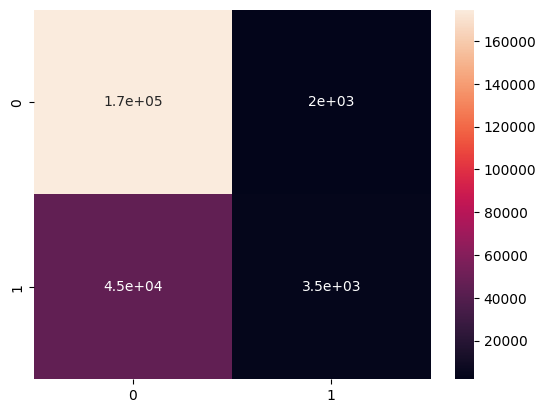

In [52]:
print(classification_report(Y_train,Y_pred_knn))
sb.heatmap(confusion_matrix(Y_train,Y_pred_knn), annot = True)

In [58]:
#Using KNN with SMOTE Balanced dataset

#fitting the model 
KNN_sm = classifier.fit(X_train_sm, Y_train_sm)

#predicting the model
Y_pred_knn_sm = KNN_sm.predict(X_train_sm)
Y_pred_knn_sm


array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

78.42697393018592
78.42697393018592
              precision    recall  f1-score   support

           0       0.83      0.72      0.77    176526
           1       0.75      0.85      0.80    176526

    accuracy                           0.78    353052
   macro avg       0.79      0.78      0.78    353052
weighted avg       0.79      0.78      0.78    353052



<Axes: >

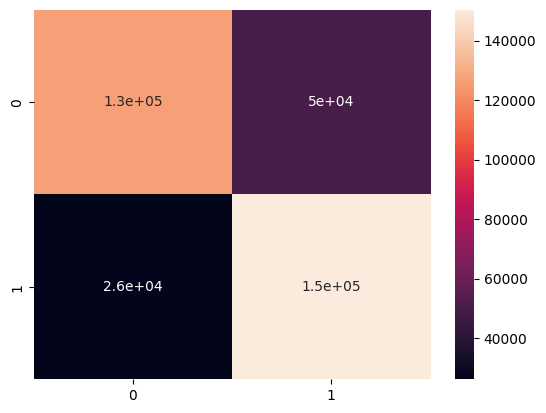

In [54]:
print(accuracy_score(Y_train_sm, Y_pred_knn_sm)*100)
print(roc_auc_score(Y_train_sm, Y_pred_knn_sm)*100)
print(classification_report(Y_train_sm,Y_pred_knn_sm))
sb.heatmap(confusion_matrix(Y_train_sm,Y_pred_knn_sm), annot = True)

In [56]:
# Using KNN with Random Oversampling

#fitting the model 
KNN_rs = classifier.fit(X_train_rs, Y_train_rs)

#predicting the model
Y_pred_knn_rs = KNN_rs.predict(X_train_rs)
Y_pred_knn_rs

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

73.40146305171288
64.97286518699795
              precision    recall  f1-score   support

           0       0.75      0.90      0.82    176526
           1       0.67      0.40      0.50     88263

    accuracy                           0.73    264789
   macro avg       0.71      0.65      0.66    264789
weighted avg       0.72      0.73      0.71    264789



<Axes: >

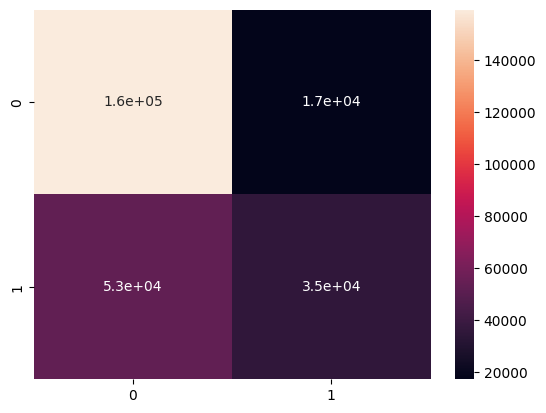

In [57]:
print(accuracy_score(Y_train_rs, Y_pred_knn_rs)*100)
print(roc_auc_score(Y_train_rs, Y_pred_knn_rs)*100)
print(classification_report(Y_train_rs,Y_pred_knn_rs))
sb.heatmap(confusion_matrix(Y_train_rs,Y_pred_knn_rs), annot = True)

# Performing Feature Engineering and Feature Selection on Test Dataset

In [119]:
test_df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [120]:
test_df.dropna(subset = ['Employment.Type'], inplace = True)

In [121]:
test_df['Employment.Type'].value_counts(normalize = True)*100

Employment.Type
Self employed    54.88256
Salaried         45.11744
Name: proportion, dtype: float64

In [122]:
test_df["Self employed"] = pd.get_dummies(test_df["Employment.Type"],drop_first = True, dtype =int)
test_df.head()

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id   
0    655269             53478       63558  86.54         67        22807  \
1    723482             55513       63163  89.45         67        22807   
2    758529             65282       84320  79.93         78        23135   
3    763449             46905       63896  76.58         78        17014   
4    708663             51428       63896  86.08         78        17014   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  ...   
0               45                1497      01-01-74        Salaried  ...  \
1               45                1497      20-05-85   Self employed  ...   
2               86                2071      14-10-95        Salaried  ...   
3               45                2070      01-06-73   Self employed  ...   
4               45                2069      01-06-72        Salaried  ...   

  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT   
0                     0                     0                   0  \
1                     0                     0                5605   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS   
0               0                             0  \
1               0                             1   
2               0                             0   
3               0                             0   
4               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE   
0                                    0         0yrs 0mon  \
1                                    0         0yrs 8mon   
2                                    0         0yrs 0mon   
3                                    0         2yrs 5mon   
4                                    0         0yrs 0mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  Self employed  
0              0yrs 0mon                0              0  
1              1yrs 0mon                1              1  
2              0yrs 0mon                0              0  
3              2yrs 5mon                0              1  
4              0yrs 0mon                0              0  

[5 rows x 41 columns]

In [123]:
# dropping insignificant categorical variables based on train data

test_df.drop(["PAN_flag","Driving_flag","Passport_flag"], axis =1, inplace = True)

In [124]:
# Feature Engineering and created Age at the time of disbursal
test_df['AGE'] = (2000+test_df['DisbursalDate'].str.split("-").str[2].astype(int)) - (1900+test_df['Date.of.Birth'].str.split("-").str[2].astype(int)) 
test_df['AGE'].unique()

array([44, 33, 23, 45, 46, 50, 36, 30, 38, 43, 35, 32, 52, 41, 28, 51, 47,
       24, 39, 49, 22, 59, 40, 48, 27, 61, 56, 26, 34, 55, 21, 25, 29, 31,
       57, 58, 37, 53, 54, 42, 62, 63, 60, 64])

In [125]:
#converting string to age
test_df["CREDIT.LENGTH"] = test_df['CREDIT.HISTORY.LENGTH'].apply(duration)
test_df["ACCT.AGE"] = test_df['AVERAGE.ACCT.AGE'].apply(duration)

In [126]:
#Merging Primary and Secondary accounts for the loanee
test_df['TOTAL.NO.OF.ACCTS'] = test_df['PRI.NO.OF.ACCTS'] + test_df['SEC.NO.OF.ACCTS']
test_df['TOTAL.ACTIVE.ACCTS'] = test_df['PRI.ACTIVE.ACCTS'] + test_df['SEC.ACTIVE.ACCTS']
test_df['TOTAL.OVERDUE.ACCTS'] = test_df['PRI.OVERDUE.ACCTS'] + test_df['SEC.OVERDUE.ACCTS']
test_df['TOTAL.CURRENT.BALANCE'] = test_df['PRI.CURRENT.BALANCE'] + test_df['SEC.CURRENT.BALANCE']
test_df['TOTAL.SANCTIONED.AMOUNT'] = test_df['PRI.SANCTIONED.AMOUNT'] + test_df['SEC.SANCTIONED.AMOUNT']
test_df['TOTAL.DISBURSED.AMOUNT'] = test_df['PRI.DISBURSED.AMOUNT'] + test_df['SEC.DISBURSED.AMOUNT']
test_df['TOTAL.INSTAL.AMT'] = test_df['PRIMARY.INSTAL.AMT'] + test_df['SEC.INSTAL.AMT']


In [127]:
#dropping unnesecarry columns
test_df.drop(["UniqueID",'branch_id',
      'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
    'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',"AVERAGE.ACCT.AGE", "CREDIT.HISTORY.LENGTH"], axis =1, inplace = True)

In [128]:
#dropping unwanted variables
test_df.drop(['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT','PERFORM_CNS.SCORE.DESCRIPTION'], axis =1, inplace = True)

In [129]:
# dropping insignificant numeric variables based on train data

test_df.drop(['asset_cost', 'NEW.ACCTS.IN.LAST.SIX.MONTHS','ACCT.AGE','TOTAL.CURRENT.BALANCE', 'TOTAL.SANCTIONED.AMOUNT',
       'TOTAL.DISBURSED.AMOUNT', 'TOTAL.INSTAL.AMT'], axis = 1, inplace = True)

In [130]:
test_df.shape

(108949, 14)

In [131]:
x = test_df
num_test = ['disbursed_amount', 'ltv', 'PERFORM_CNS.SCORE',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 'AGE', 'CREDIT.LENGTH',
       'TOTAL.NO.OF.ACCTS', 'TOTAL.ACTIVE.ACCTS', 'TOTAL.OVERDUE.ACCTS']
cat_test = ['MobileNo_Avl_Flag', 'Aadhar_flag',
       'VoterID_flag','Self employed' ]

In [132]:
#Standardising only the numeric variables 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_num = pd.DataFrame(data = scaler.fit_transform(x[num_test]), columns = num_test)
x_cat = pd.DataFrame(data = x[cat], columns = cat)
X_test = pd.concat([x_num.reset_index(drop=True), x_cat.reset_index(drop=True)], axis=1)

In [133]:
Y_pred_test = KNN_sm.predict(X_test)
Y_pred_test

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

# Using Cross Validation to check the Accuracy

In [67]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict

cv = KFold(n_splits = 10, shuffle = True)
skf = StratifiedKFold(n_splits = 10, shuffle = True)
# Perform cross-validation and calculate the accuracy scores for logistic regression model
precision = cross_val_score(model , X_train_sm, Y_train_sm,cv = skf, scoring = 'precision')
recall = cross_val_score(model , X_train_sm, Y_train_sm,cv = skf, scoring = 'recall')

# Print the accuracy scores for each fold
print("Accuracy precision for each fold:", precision)
print("Accuracy recall for each fold:", recall)

# Calculate the average accuracy score
print("Average precision for each fold:", precision.mean())
print("Average recall for each fold:", recall.mean())

Accuracy precision for each fold: [0.58378183 0.58306775 0.58189013 0.58173648 0.58183862 0.58525654
 0.57997312 0.58235021 0.58163685 0.5786131 ]
Accuracy recall for each fold: [0.64351668 0.63785192 0.63720825 0.64100385 0.64383639 0.64332654
 0.63705886 0.6383051  0.64379992 0.63581261]
Average precision for each fold: 0.5820144634965796
Average recall for each fold: 0.6401720125476028


In [102]:
#Using Stratified K Fold cross validation
skf = StratifiedKFold(n_splits = 10, shuffle = True)

# Perform cross-validation and calculate the accuracy scores
pre_knn = cross_val_score(KNN_sm , X_train_sm, Y_train_sm,cv = skf, scoring = 'precision')
recall_knn = cross_val_score(KNN_sm , X_train_sm, Y_train_sm,cv = skf, scoring = 'recall')
auc_knn = cross_val_score(KNN_sm , X_train_sm, Y_train_sm,cv = skf, scoring = 'roc_auc')


# Print the accuracy scores for each fold
#print("Accuracy precision for each fold:", pre_knn)
#print("Accuracy recall for each fold:", recall_knn)
#print("Accuracy auc score for each fold:", auc_knn)


# Calculate the average accuracy score
print("Average precision for each fold:", pre_knn.mean())
print("Average recall for each fold:", recall_knn.mean())
print("Accuracy auc score for each fold:", auc_knn.mean())


Average precision for each fold: 0.6855831624560919
Average recall for each fold: 0.7814089408389997
Accuracy auc score for each fold: 0.7827576158320633


Decision Tree Model

In [72]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train, Y_train)

DecisionTreeClassifier()

In [74]:
from sklearn import tree
plt.figure(figsize= (20,20))
tree.plot_tree(treemodel, filled = True)

[Text(0.48211715030597446, 0.9921875, 'x[1] <= -0.164\ngini = 0.34\nsamples = 225493\nvalue = [176526, 48967]'),
 Text(0.19007334108876725, 0.9765625, 'x[0] <= -0.067\ngini = 0.279\nsamples = 78742\nvalue = [65553, 13189]'),
 Text(0.12907789206125705, 0.9609375, 'x[2] <= 1.223\ngini = 0.244\nsamples = 55032\nvalue = [47207, 7825]'),
 Text(0.08110977696243812, 0.9453125, 'x[13] <= 0.5\ngini = 0.258\nsamples = 43449\nvalue = [36828, 6621]'),
 Text(0.034011731682947466, 0.9296875, 'x[3] <= 1.039\ngini = 0.223\nsamples = 15490\nvalue = [13506, 1984]'),
 Text(0.0210435569851643, 0.9140625, 'x[1] <= -1.016\ngini = 0.217\nsamples = 14258\nvalue = [12497, 1761]'),
 Text(0.011379837700214357, 0.8984375, 'x[0] <= -3.165\ngini = 0.197\nsamples = 6828\nvalue = [6072, 756]'),
 Text(0.00946038857232934, 0.8828125, 'x[1] <= -4.936\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.009434702565927587, 0.8671875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.009486074578731093, 0.8671875, 'gin

Error in callback <function flush_figures at 0x000001FC339EB5E0> (for post_execute):


KeyboardInterrupt: 

In [75]:
# preprunning
# In preprunning we perform hyperparameter tuning.In this we will assign different values to the parameters of decision tree

parameters = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 
             'max_depth': [5,7,9,11,13], 'max_features':['auto', 'sqrt', 'log2']}


In [78]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(treemodel, param_grid = parameters, cv =25, scoring = 'recall')
cv.fit(X_train, Y_train)

C:\Users\HP\.conda\envs\baclass\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\.conda\envs\baclass\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\.conda\envs\baclass\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\.conda\envs\baclass\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

GridSearchCV(cv=25, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11, 13],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='recall')

In [81]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'auto',
 'splitter': 'best'}

In [85]:
Y_pred_dt = cv.predict(X_train)

In [87]:
print(classification_report(Y_train, Y_pred_dt))
print(roc_auc_score(Y_train, Y_pred_dt))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88    176526
           1       0.77      0.05      0.10     48967

    accuracy                           0.79    225493
   macro avg       0.78      0.52      0.49    225493
weighted avg       0.79      0.79      0.71    225493

0.5245320041548669


In [105]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(treemodel, param_grid = parameters, cv =10, scoring = 'accuracy')
dt = cv.fit(X_train_sm, Y_train_sm)

C:\Users\HP\.conda\envs\baclass\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\.conda\envs\baclass\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\.conda\envs\baclass\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\.conda\envs\baclass\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

In [106]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [107]:
Y_pred_dt_sm = cv.predict(X_train_sm)

In [108]:
print(classification_report(Y_train_sm, Y_pred_dt_sm))
print(roc_auc_score(Y_train_sm, Y_pred_dt_sm))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62    176526
           1       0.63      0.68      0.65    176526

    accuracy                           0.64    353052
   macro avg       0.64      0.64      0.64    353052
weighted avg       0.64      0.64      0.64    353052

0.637806895301542


#from all the models the best fit model is the KNN with SMOTE resampling
#BEcause in this case it is important to have more False Negatives, we will use Recall as a measure. KNN with SMOTE has a recall of 85% on the training dataset and the validation set has a recall of 78%